In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv("application_train.csv")
test = pd.read_csv("application_test.csv")

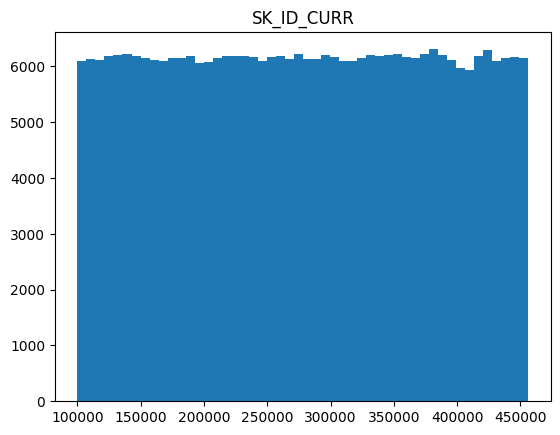

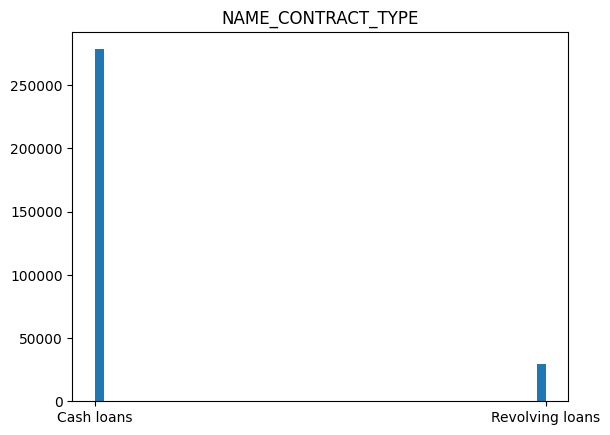

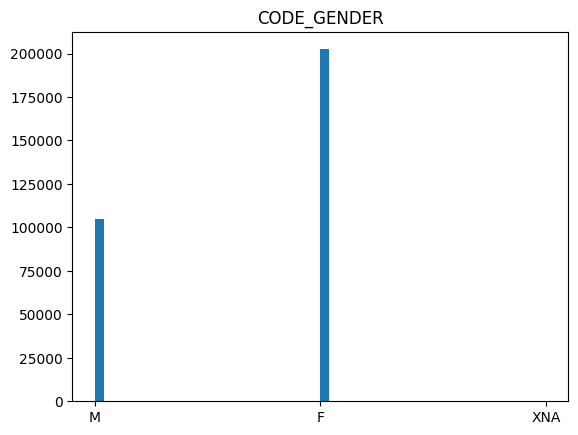

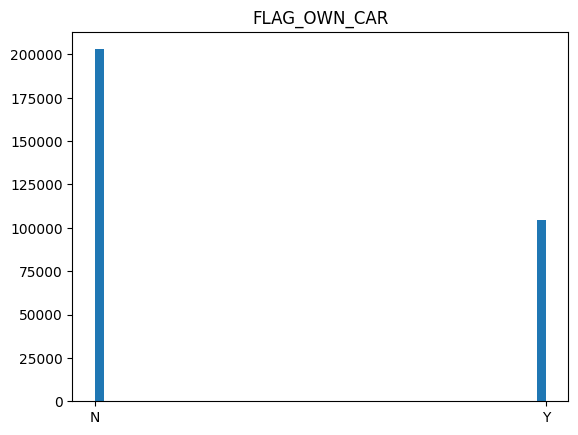

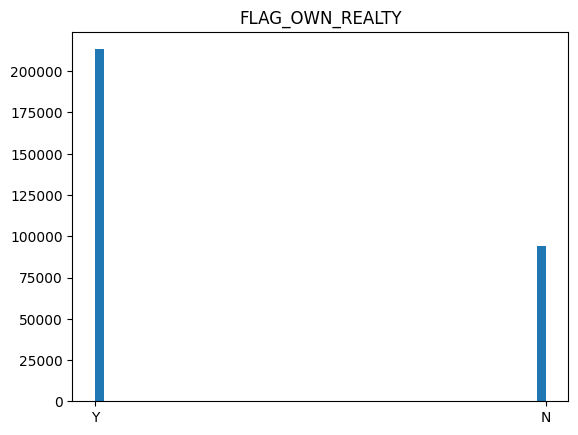

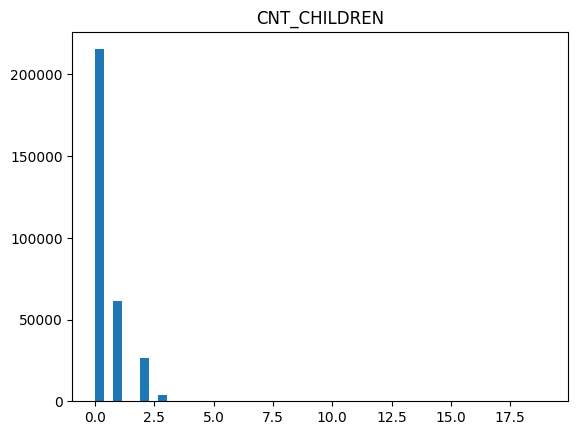

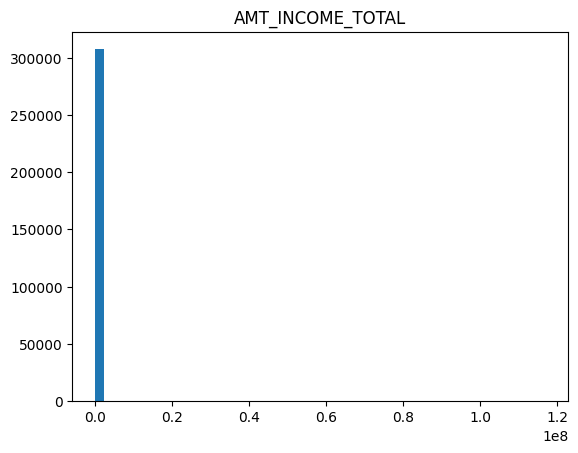

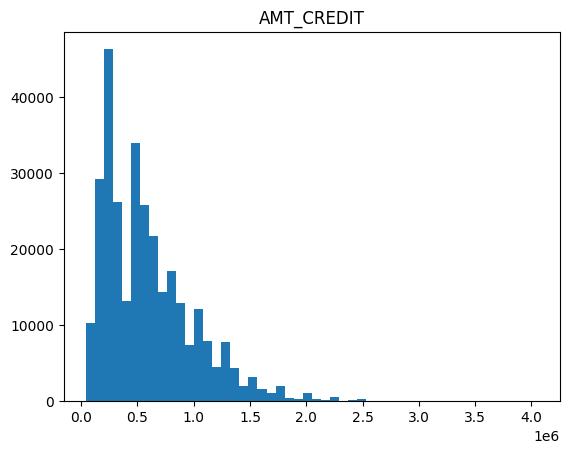

Column AMT_ANNUITY contains null values
Column AMT_GOODS_PRICE contains null values
Column NAME_TYPE_SUITE contains null values


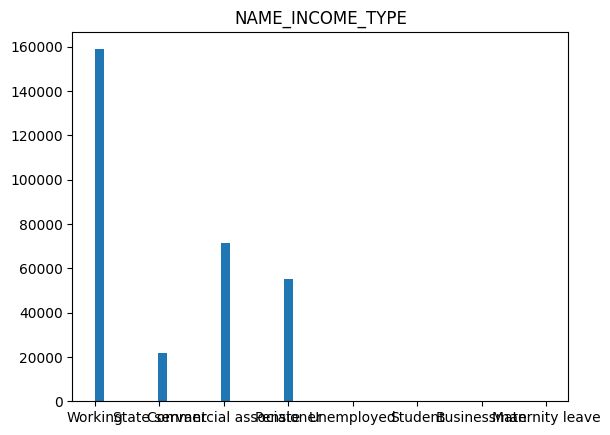

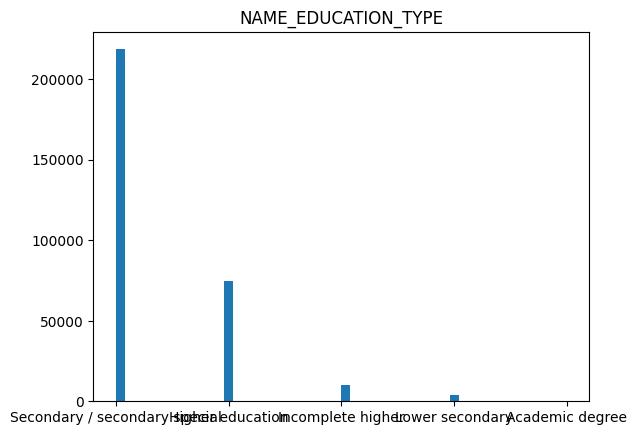

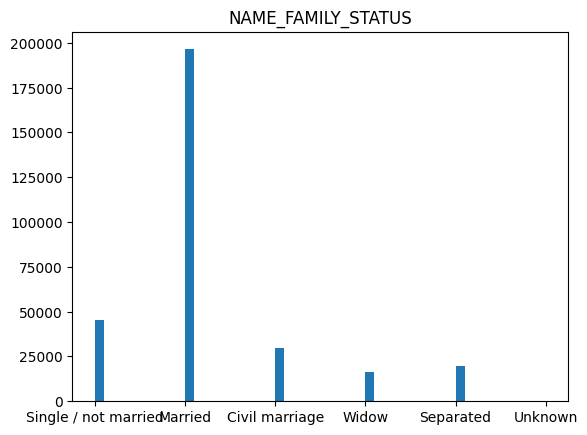

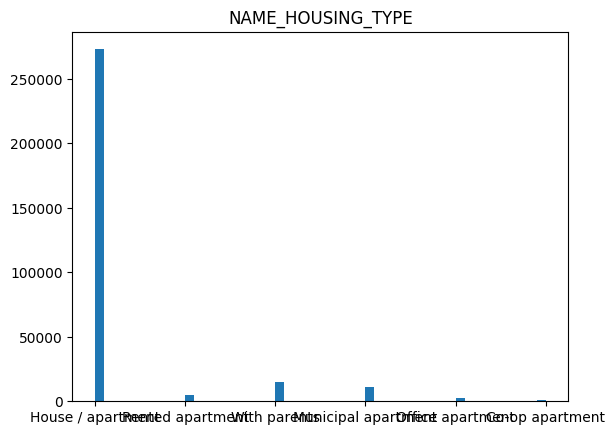

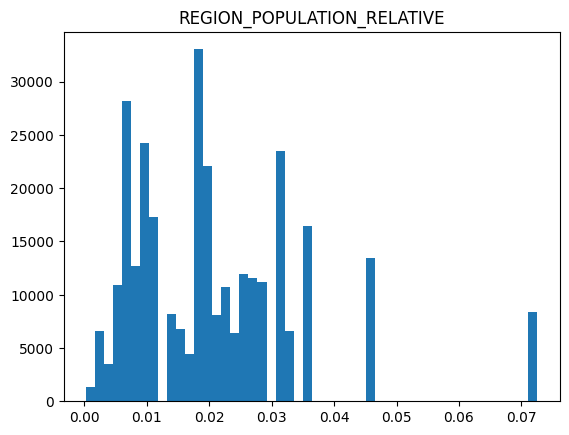

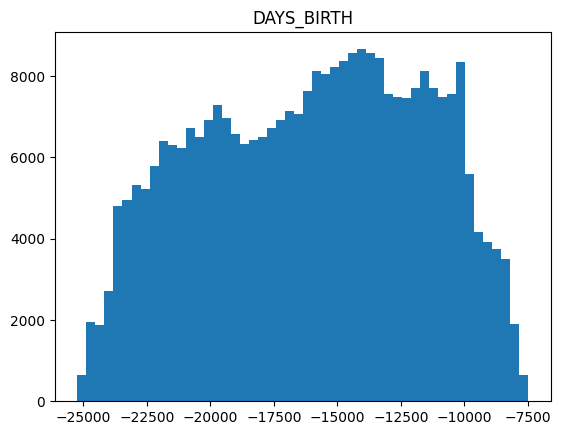

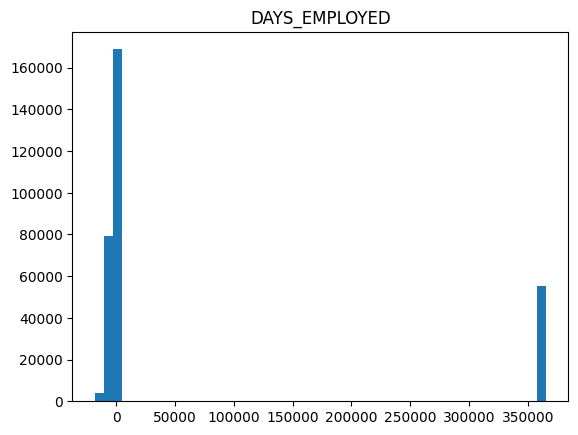

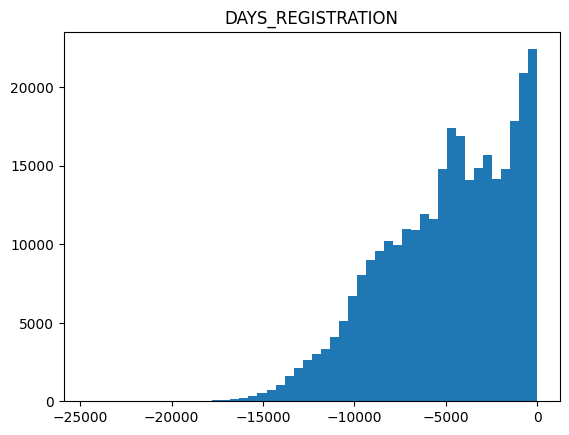

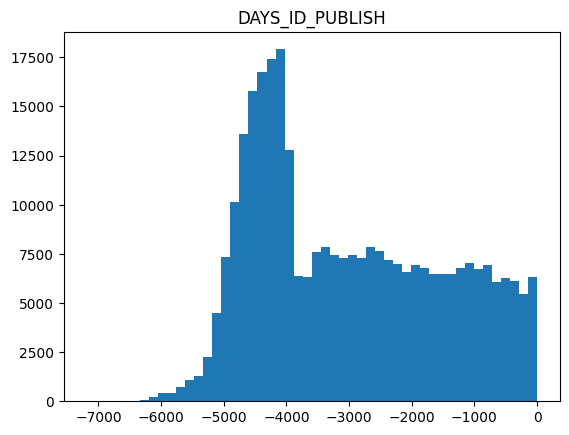

Column OWN_CAR_AGE contains null values


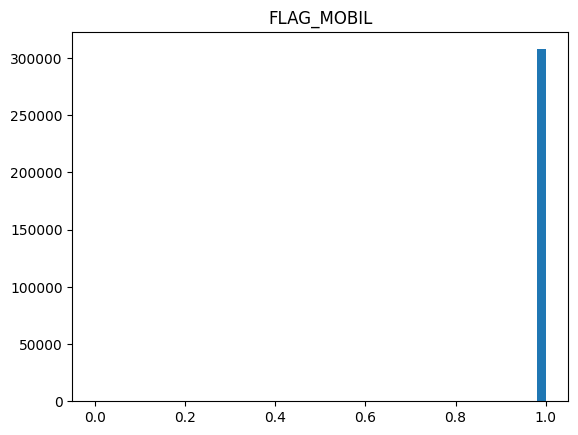

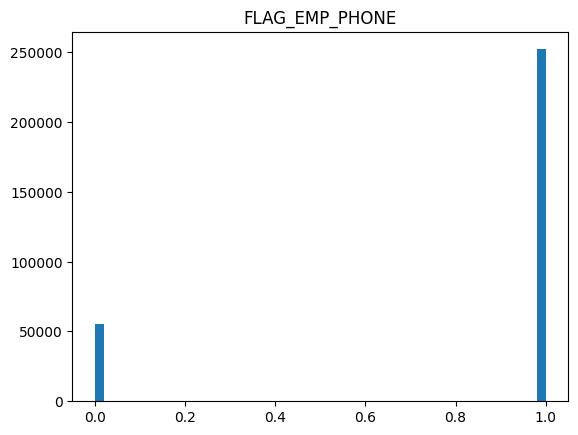

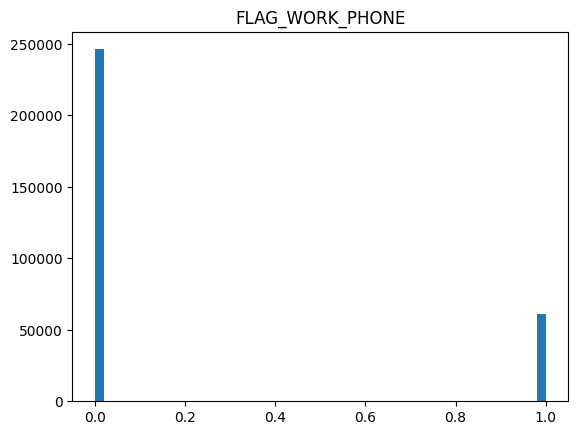

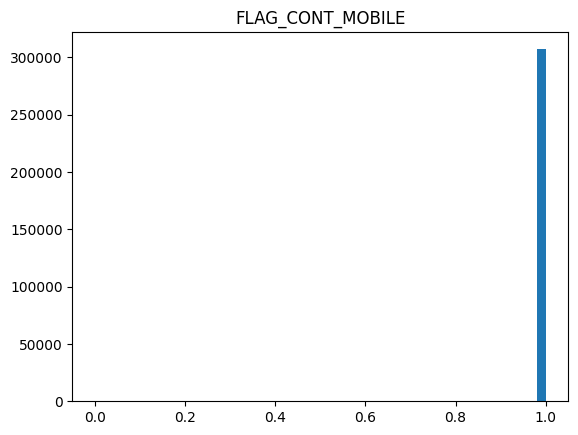

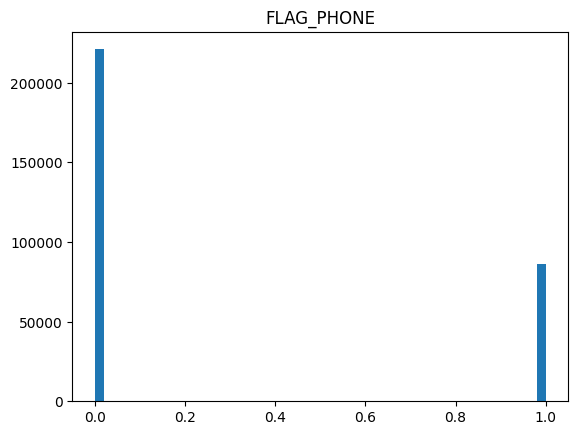

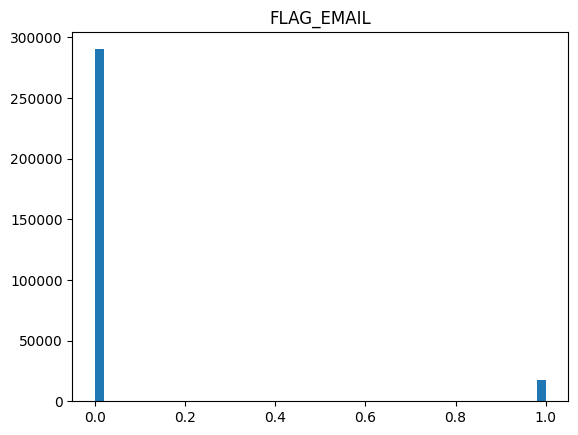

Column OCCUPATION_TYPE contains null values
Column CNT_FAM_MEMBERS contains null values


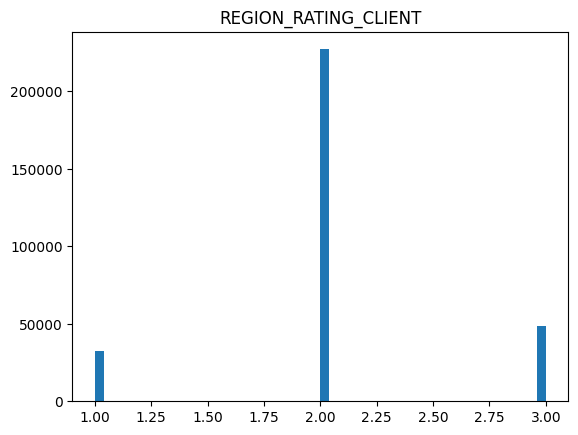

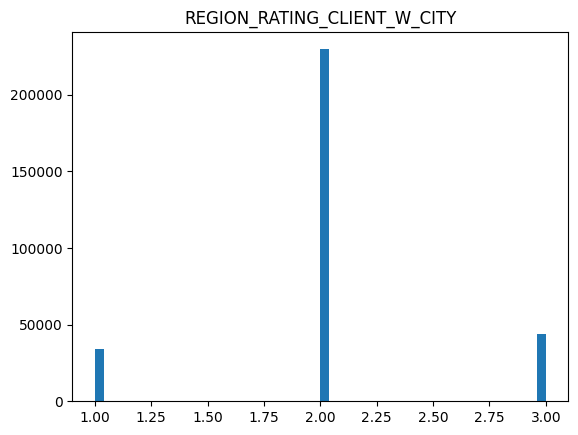

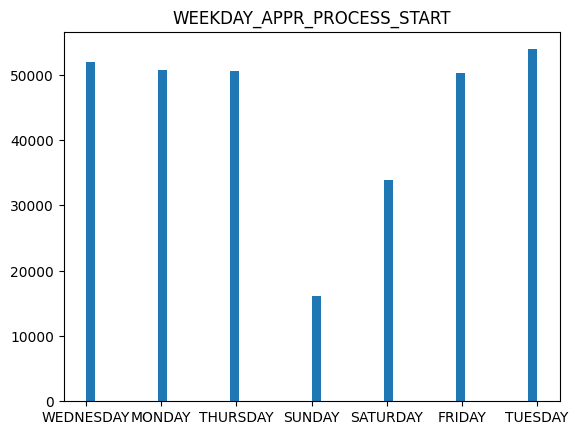

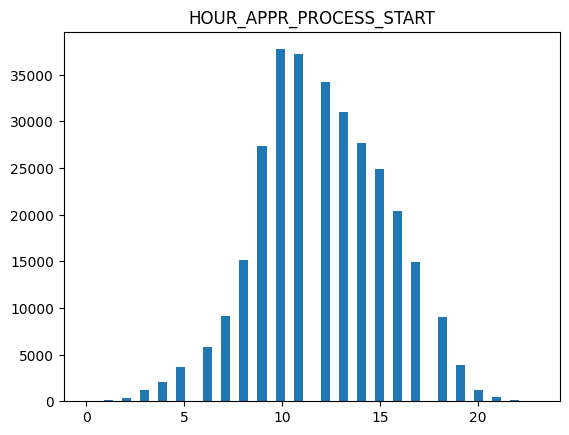

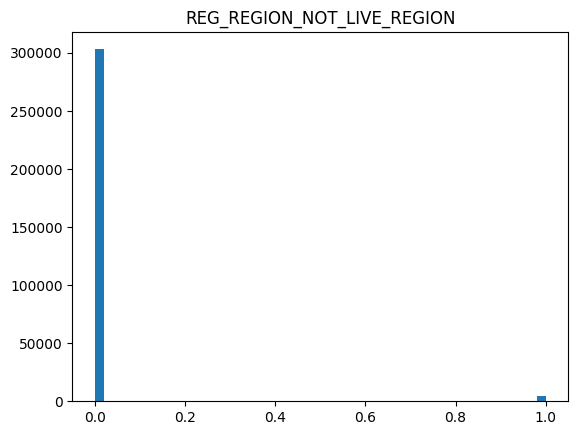

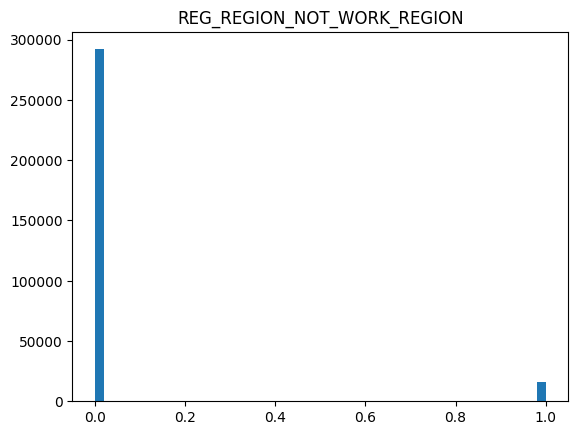

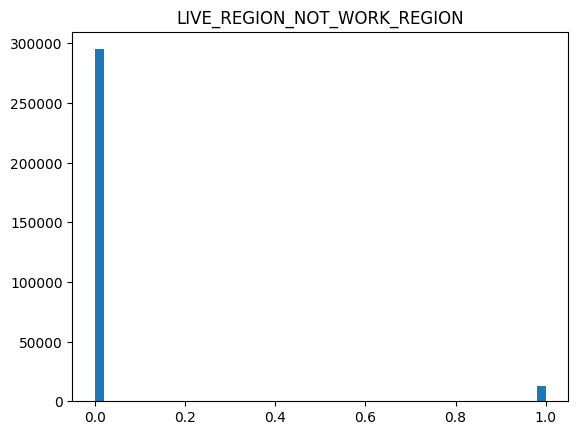

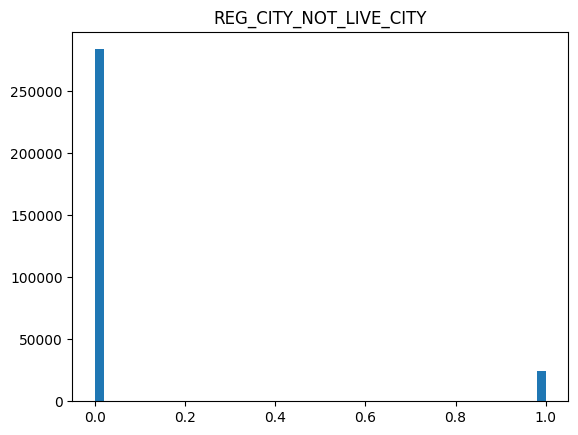

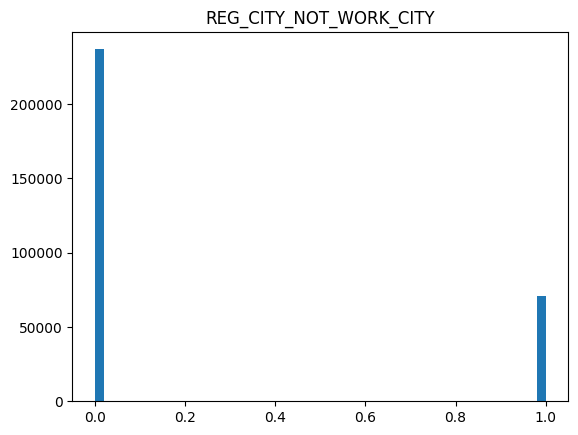

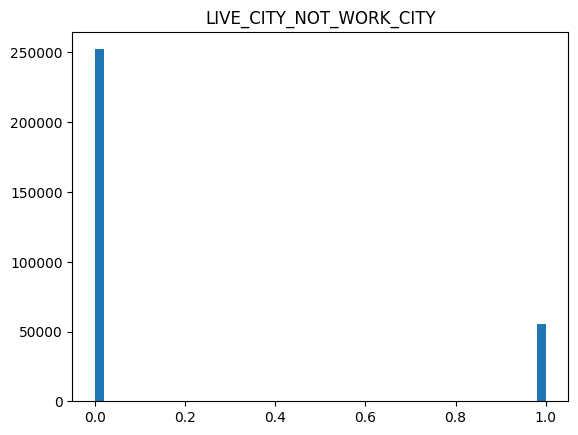

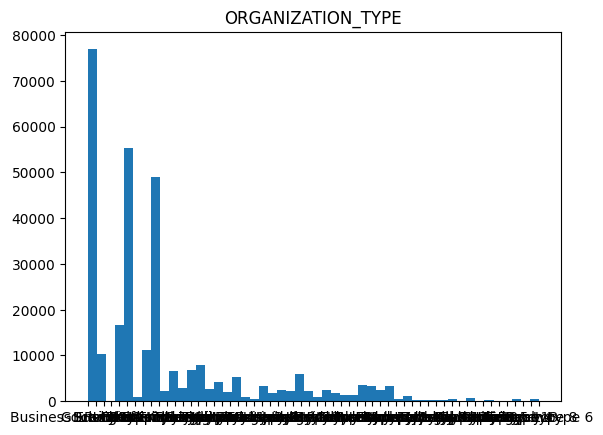

Column EXT_SOURCE_1 contains null values
Column EXT_SOURCE_2 contains null values
Column EXT_SOURCE_3 contains null values
Column APARTMENTS_AVG contains null values
Column BASEMENTAREA_AVG contains null values
Column YEARS_BEGINEXPLUATATION_AVG contains null values
Column YEARS_BUILD_AVG contains null values
Column COMMONAREA_AVG contains null values
Column ELEVATORS_AVG contains null values
Column ENTRANCES_AVG contains null values
Column FLOORSMAX_AVG contains null values
Column FLOORSMIN_AVG contains null values
Column LANDAREA_AVG contains null values
Column LIVINGAPARTMENTS_AVG contains null values
Column LIVINGAREA_AVG contains null values
Column NONLIVINGAPARTMENTS_AVG contains null values
Column NONLIVINGAREA_AVG contains null values
Column APARTMENTS_MODE contains null values
Column BASEMENTAREA_MODE contains null values
Column YEARS_BEGINEXPLUATATION_MODE contains null values
Column YEARS_BUILD_MODE contains null values
Column COMMONAREA_MODE contains null values
Column ELEV

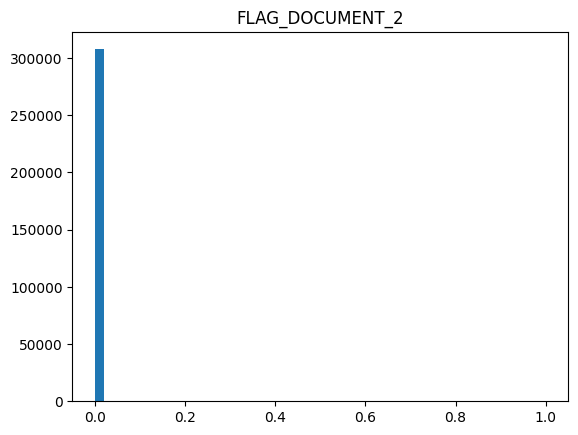

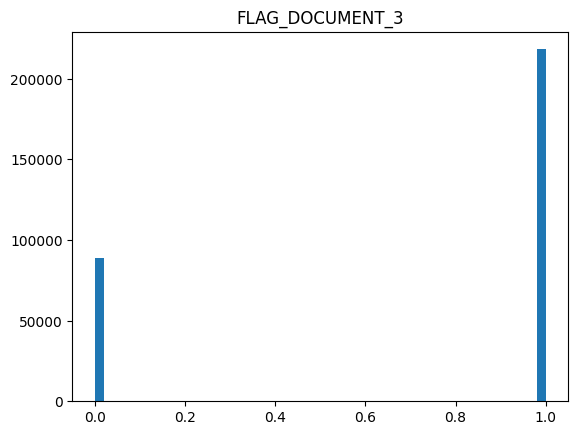

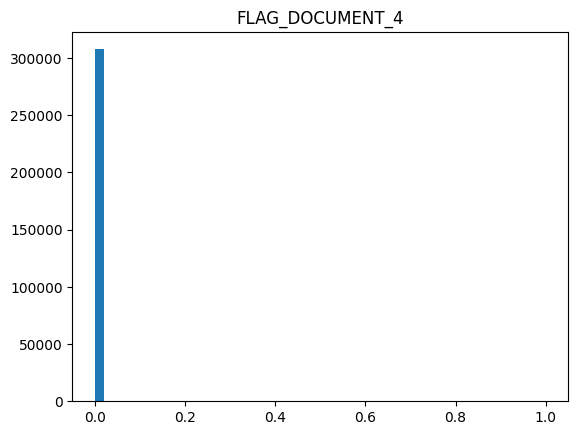

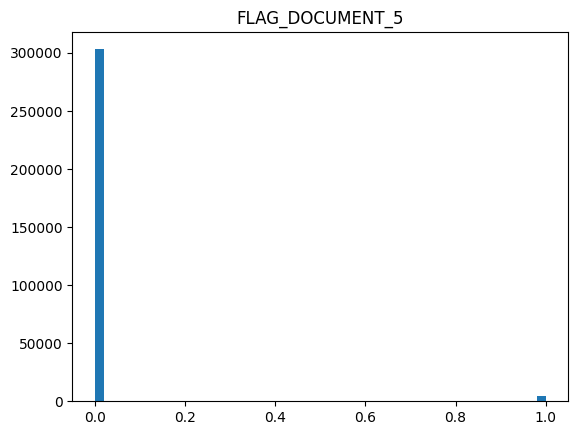

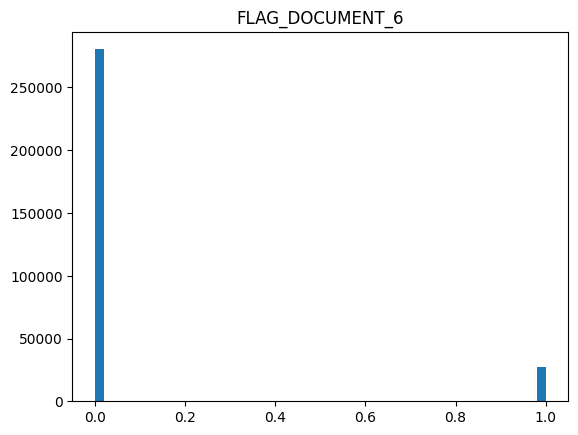

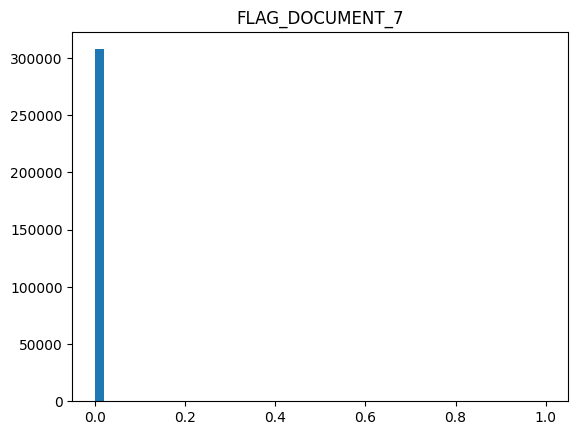

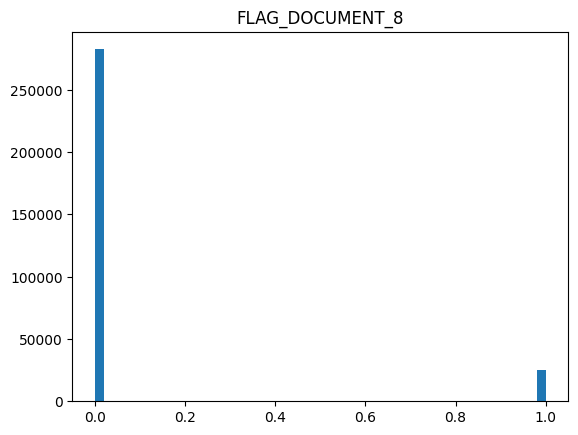

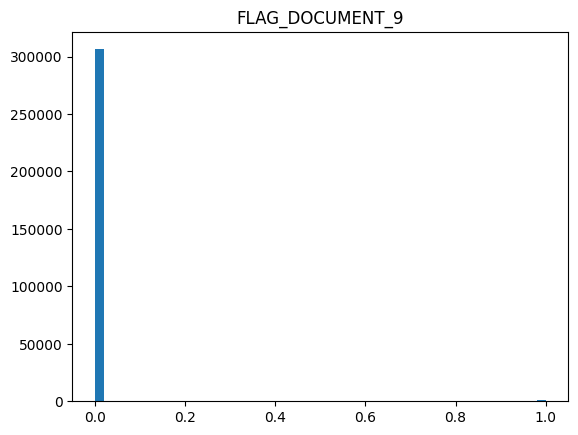

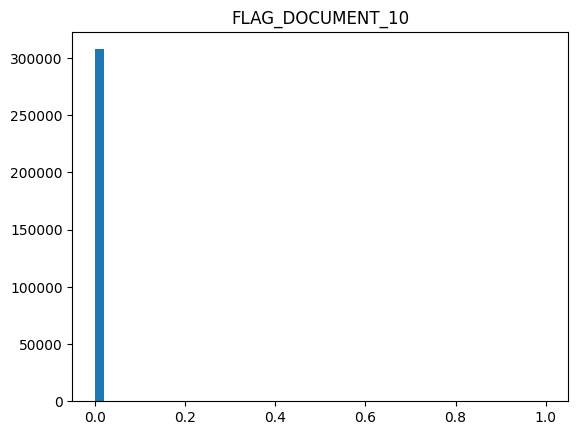

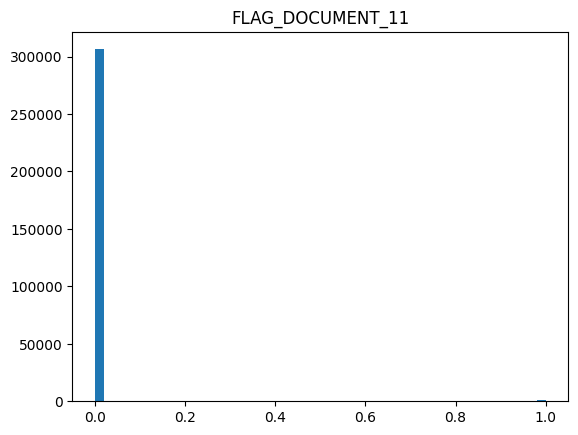

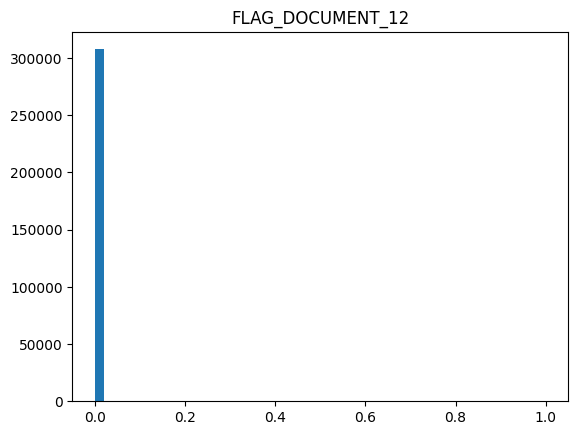

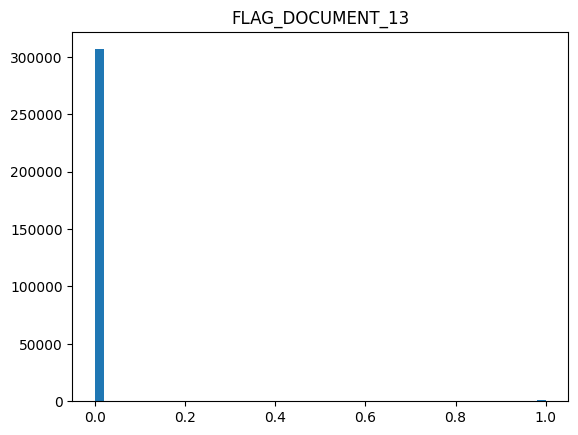

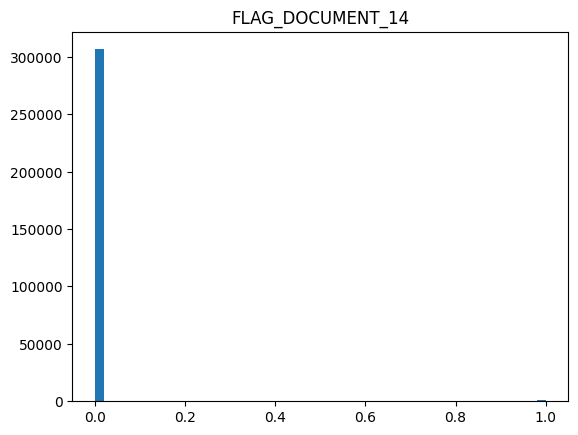

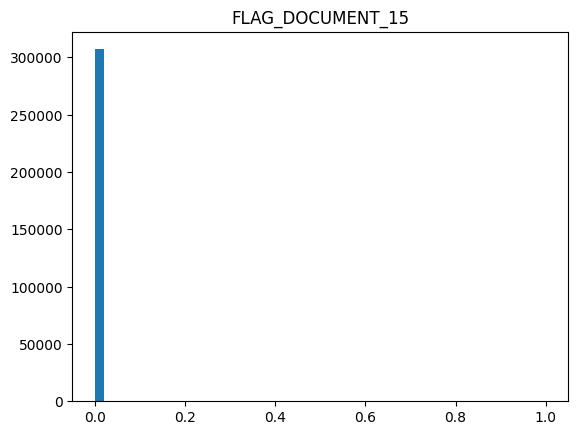

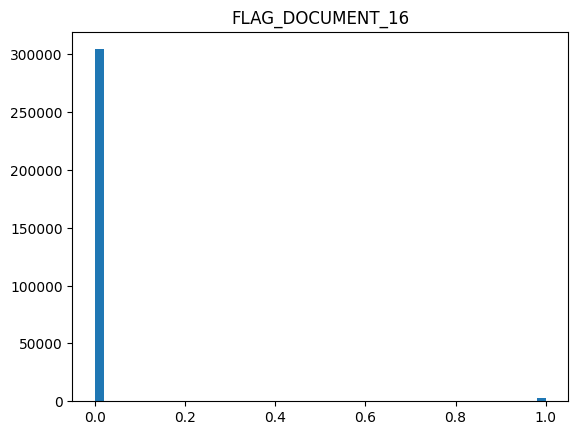

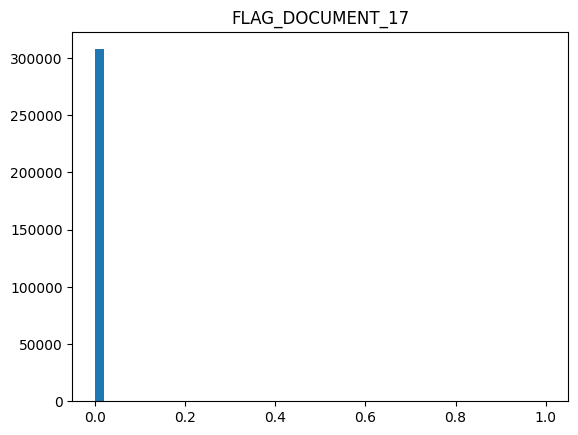

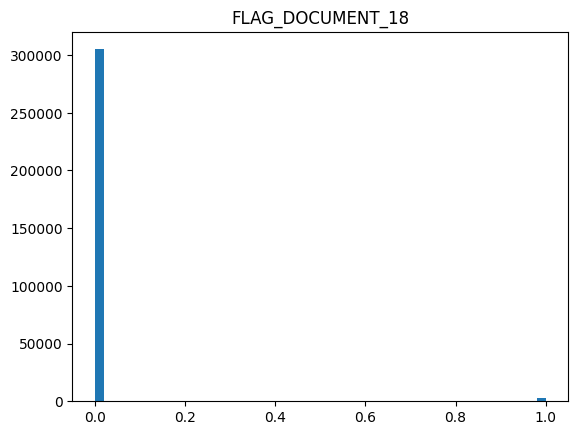

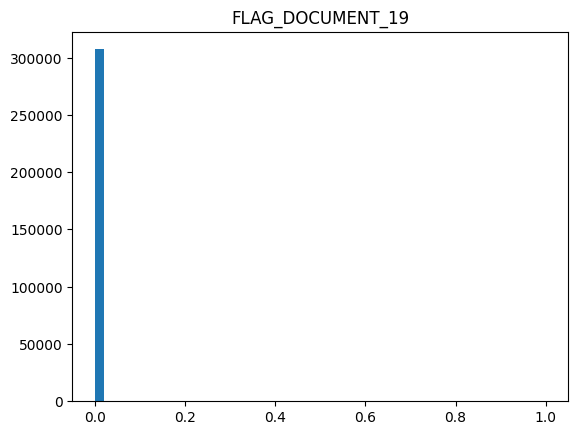

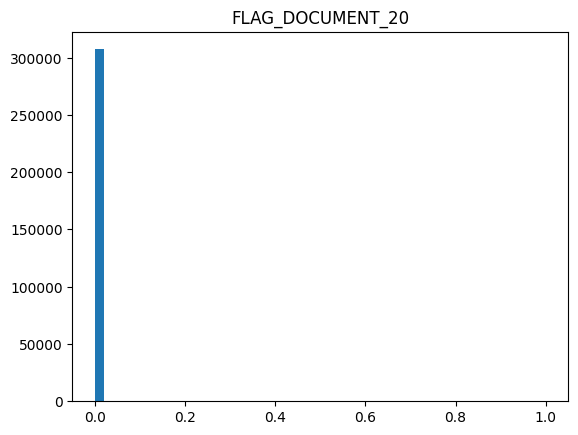

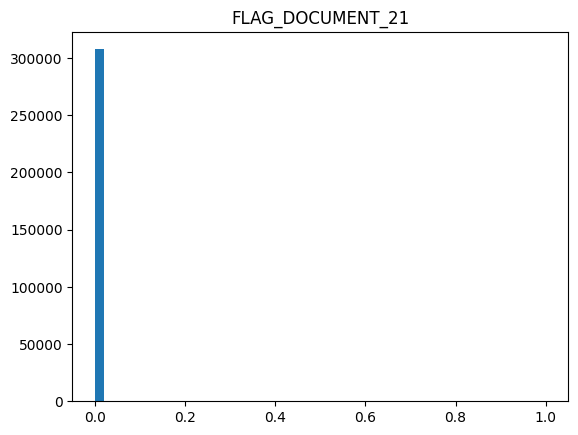

Column AMT_REQ_CREDIT_BUREAU_HOUR contains null values
Column AMT_REQ_CREDIT_BUREAU_DAY contains null values
Column AMT_REQ_CREDIT_BUREAU_WEEK contains null values
Column AMT_REQ_CREDIT_BUREAU_MON contains null values
Column AMT_REQ_CREDIT_BUREAU_QRT contains null values
Column AMT_REQ_CREDIT_BUREAU_YEAR contains null values


In [57]:
for column in train.columns:
    if column != 'TARGET':
        if train[column].isnull().sum() > 0:  # check for null values
            print(f"Column {column} contains null values")
        else:
            try:
                plt.hist(train[column], bins=50)
                plt.title(column)
                plt.show()
            except Exception as e:
                print(f"An error occurred while plotting histogram for column {column}: {str(e)}")

In [58]:
missing_values = train.isnull().sum()
print(missing_values)

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64


In [59]:
train["TARGET"].value_counts(normalize=True) * 100

TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64

In [60]:
# Заповнення медіаною
train["AMT_ANNUITY"].fillna(train["AMT_ANNUITY"].median(), inplace=True)

# Заповнення найчастішим значенням
train["NAME_TYPE_SUITE"].fillna(train["NAME_TYPE_SUITE"].mode()[0], inplace=True)

In [61]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.487841,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.461065,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [63]:
test.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,...,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,0.021226,-16068.084605,67485.366322,-4967.652716,...,0.001559,0.0,0.0,0.0,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
std,103169.547296,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,0.014428,4325.900393,144348.507136,3552.612035,...,0.039456,0.0,0.0,0.0,0.046373,0.046132,0.054037,0.110924,0.693305,1.838873
min,100001.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,0.000253,-25195.000000,-17463.000000,-23722.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188557.750000,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,0.010006,-19637.000000,-2910.000000,-7459.250000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277549.000000,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,0.018850,-15785.000000,-1293.000000,-4490.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,367555.500000,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,0.028663,-12496.000000,-296.000000,-1901.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,456250.000000,20.000000,4.410000e+06,2.245500e+06,180576.000000,2.245500e+06,0.072508,-7338.000000,365243.000000,0.000000,...,1.000000,0.0,0.0,0.0,2.000000,2.000000,2.000000,6.000000,7.000000,17.000000


In [64]:
for column in train.select_dtypes(include=['object']).columns:
    if set(train[column]) != set(test[column]):
        print('Not the same categories in', column)

Not the same categories in CODE_GENDER
Not the same categories in NAME_TYPE_SUITE
Not the same categories in NAME_INCOME_TYPE
Not the same categories in NAME_FAMILY_STATUS


In [65]:
# One-Hot Encoding
train = pd.get_dummies(train)

# Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in train:
    if train[col].dtype == 'object':
        train[col] = le.fit_transform(train[col])

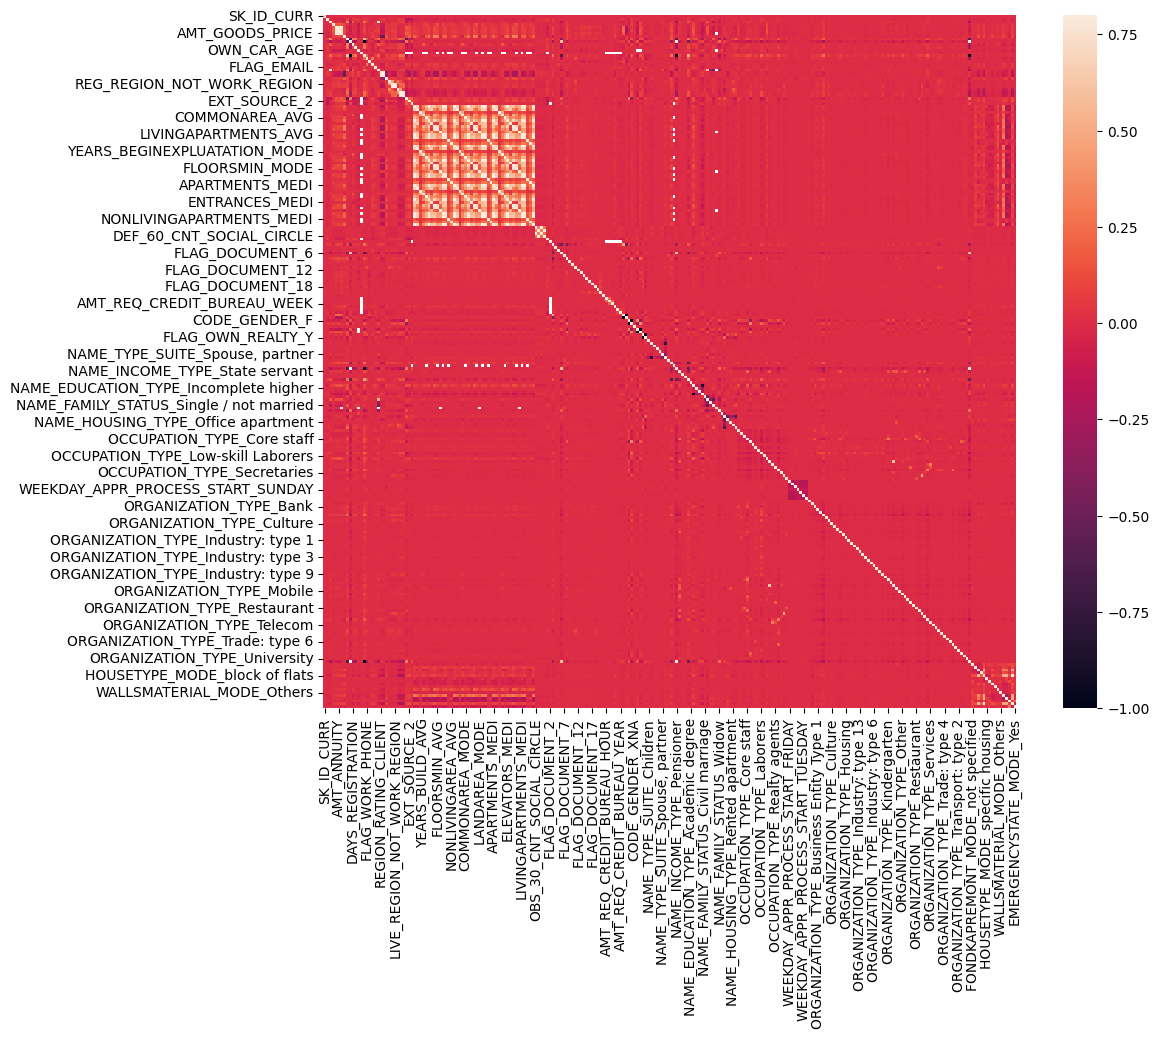

In [66]:
correlation_matrix = train.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, vmax=.8, square=True)
plt.show()

<Axes: xlabel='AMT_INCOME_TOTAL'>

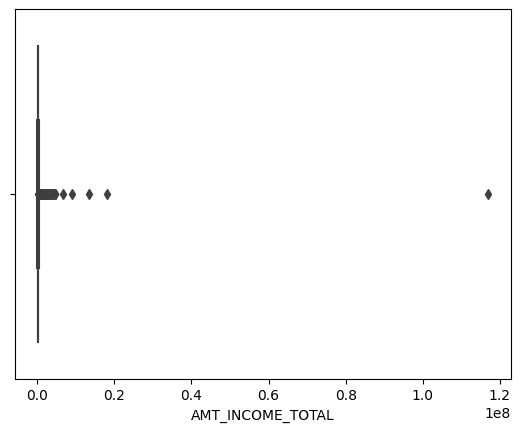

In [67]:
# Boxplot для оцінки викидів
sns.boxplot(x=train['AMT_INCOME_TOTAL'])

In [68]:
# Видалення викидів
Q1 = train['AMT_INCOME_TOTAL'].quantile(0.25)
Q3 = train['AMT_INCOME_TOTAL'].quantile(0.75)
IQR = Q3 - Q1
filter = (train['AMT_INCOME_TOTAL'] >= Q1 - 1.5 * IQR) & (train['AMT_INCOME_TOTAL'] <= Q3 + 1.5 *IQR)
train = train.loc[filter]  

# Заміна викидів медіаною
median = train.loc[train['AMT_INCOME_TOTAL']<train['AMT_INCOME_TOTAL'].quantile(0.95), 'AMT_INCOME_TOTAL'].median()
train.loc[train['AMT_INCOME_TOTAL']>train['AMT_INCOME_TOTAL'].quantile(0.95), 'AMT_INCOME_TOTAL'] = np.nan
train.fillna(median,inplace=True)

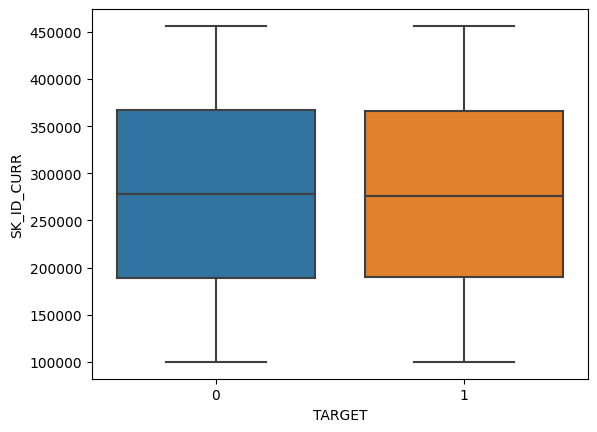

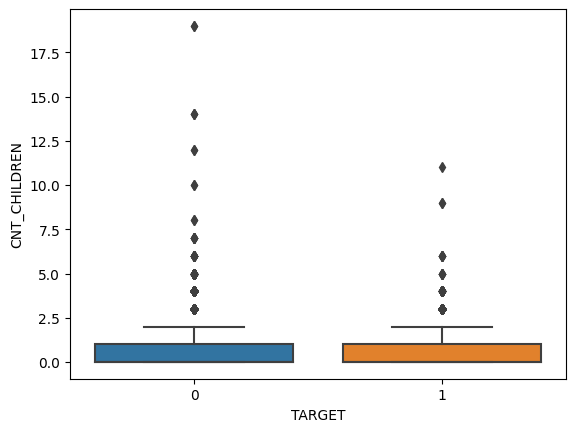

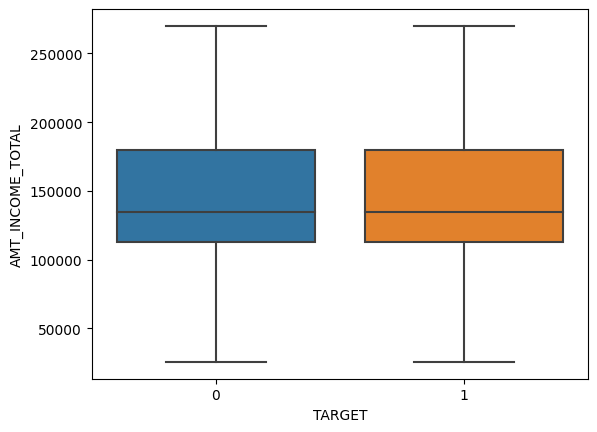

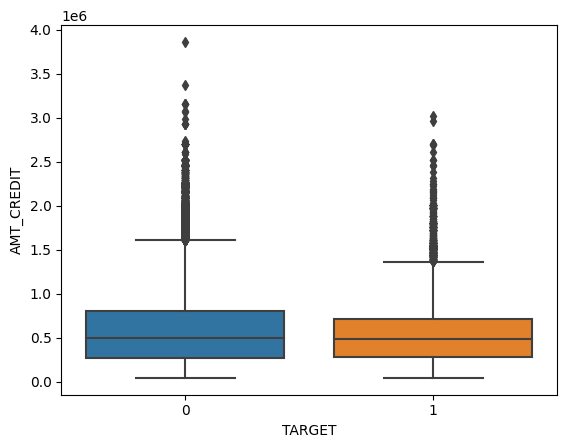

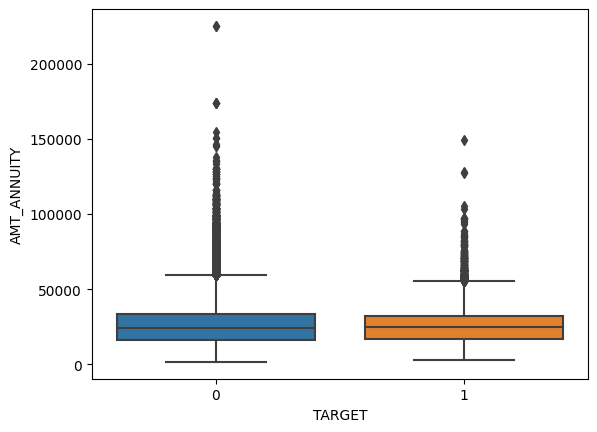

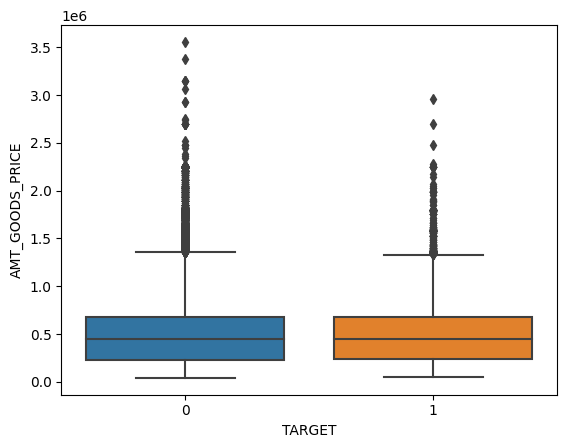

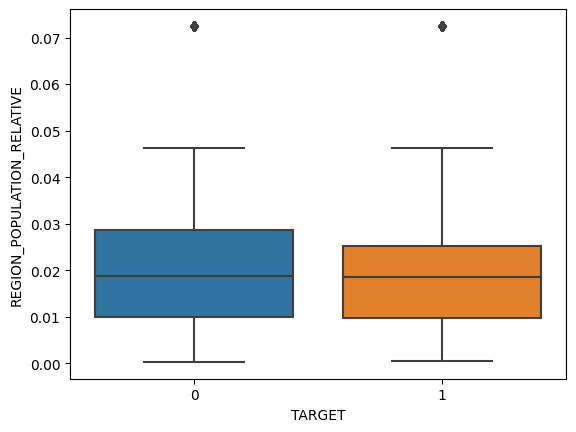

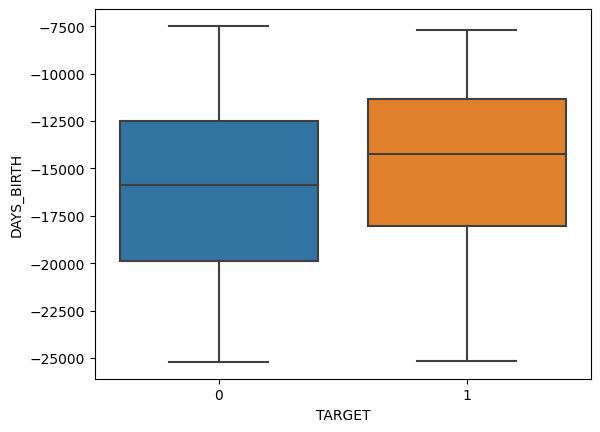

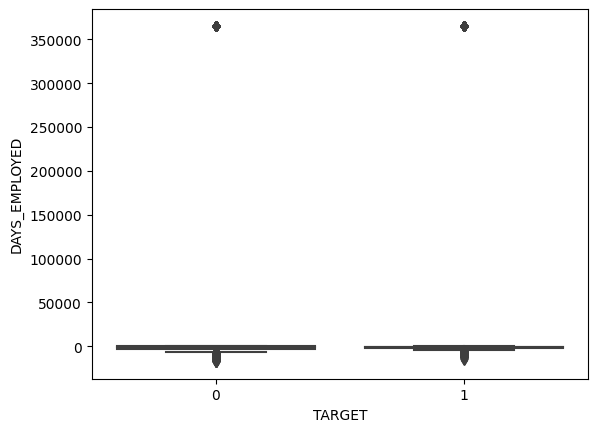

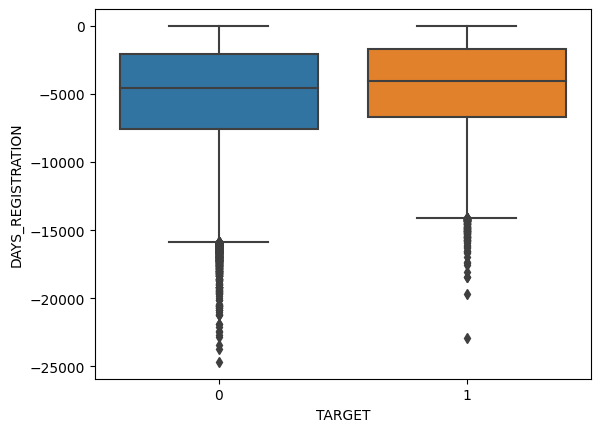

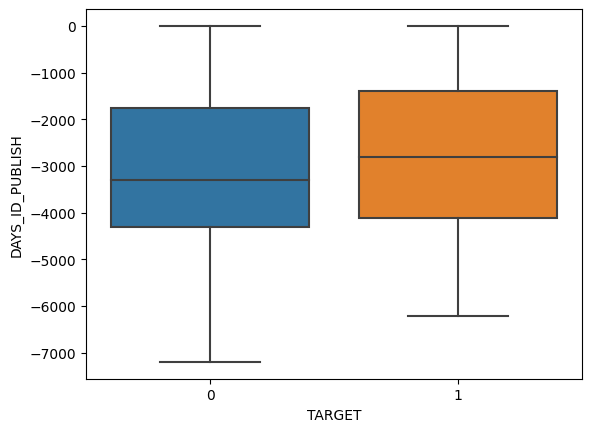

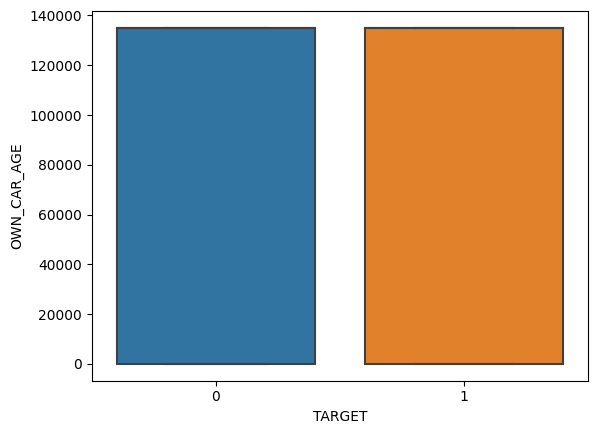

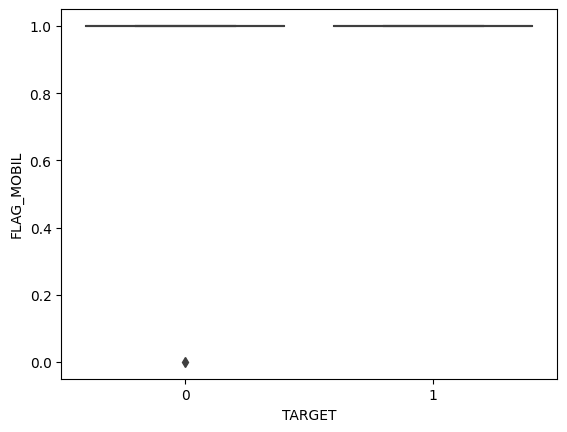

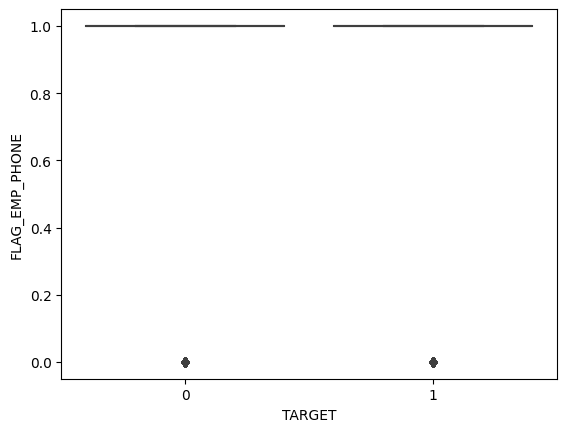

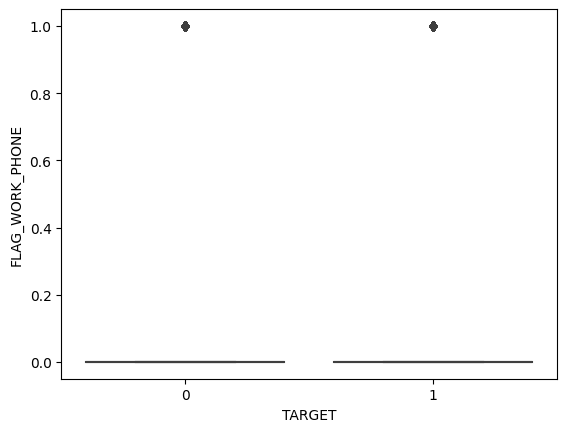

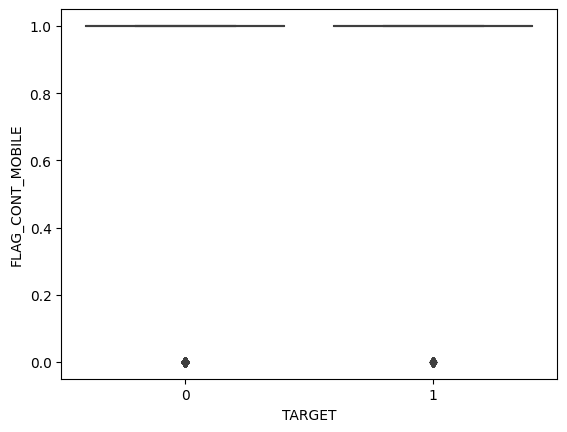

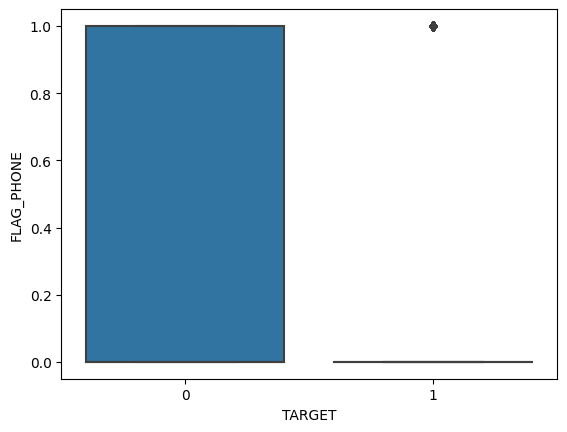

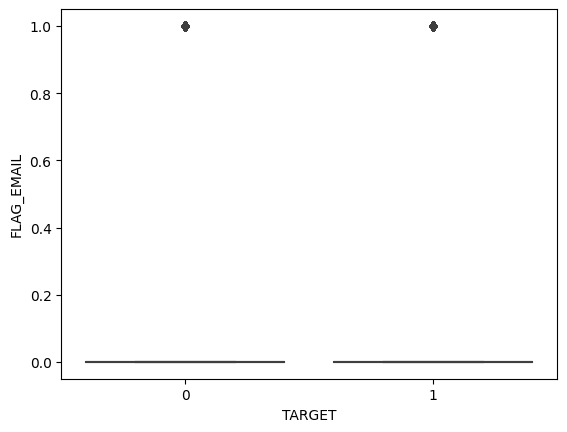

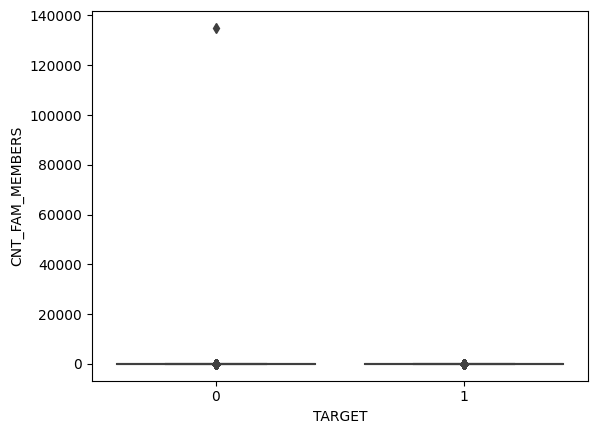

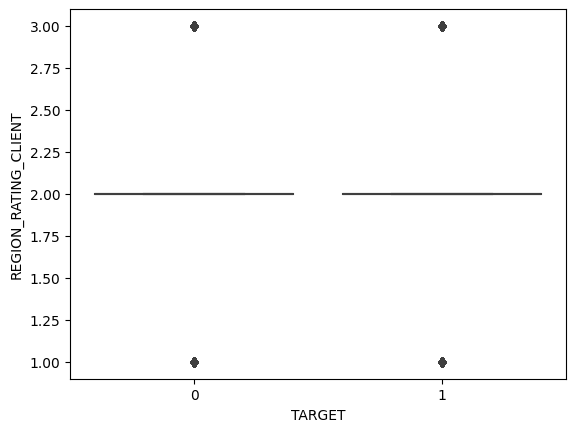

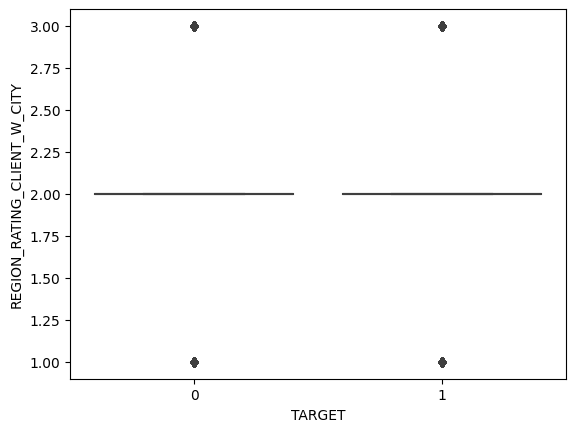

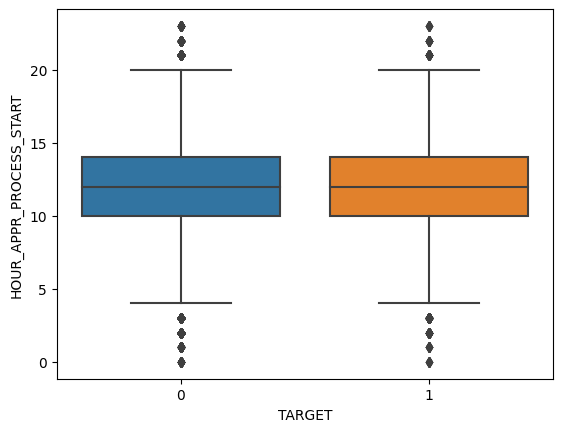

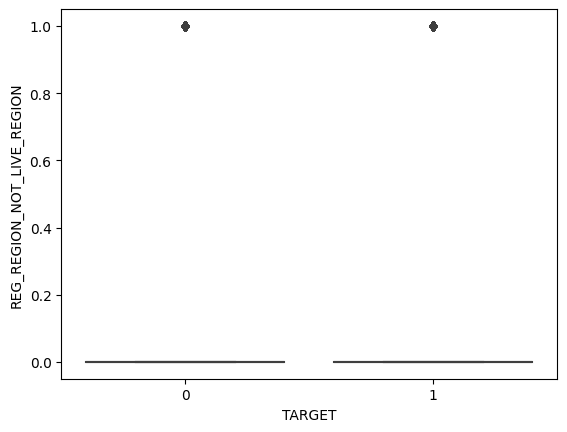

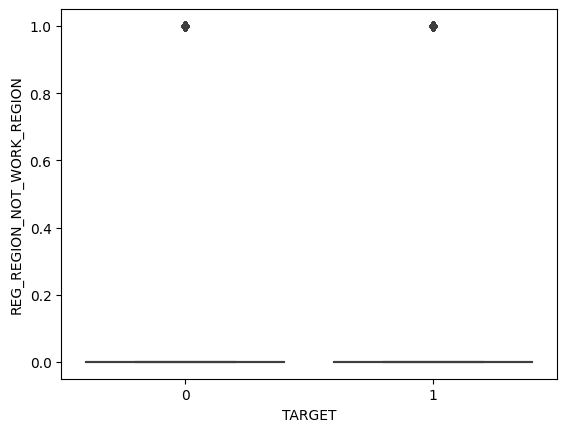

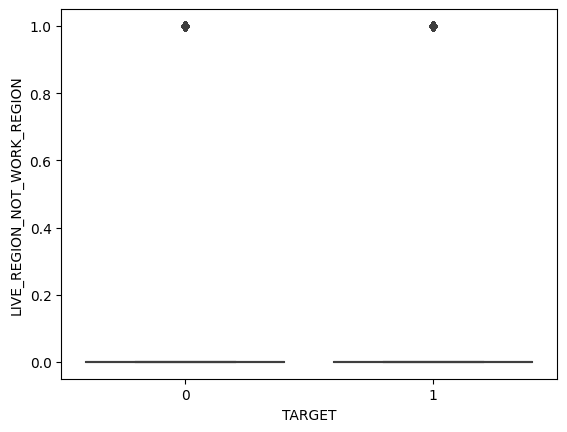

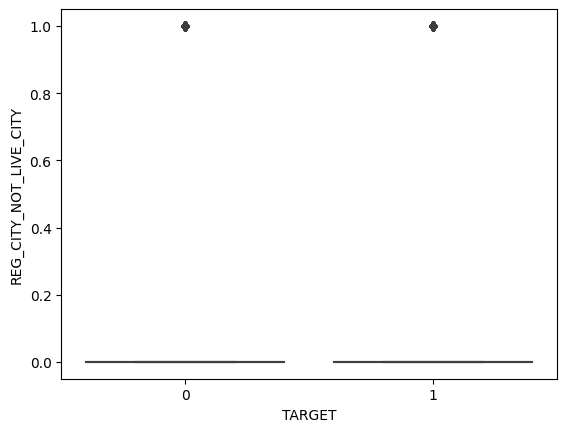

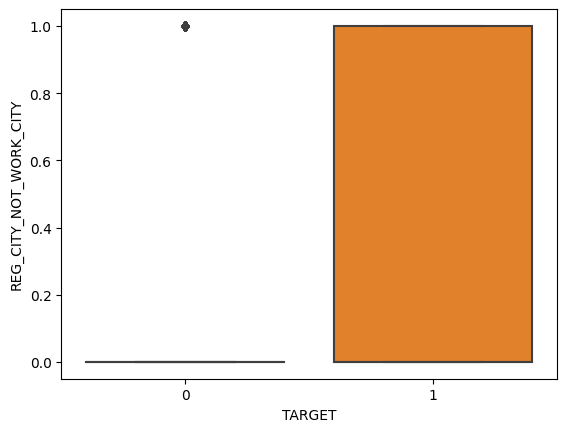

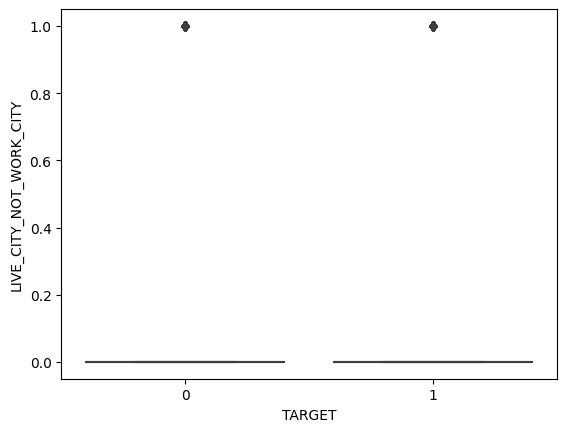

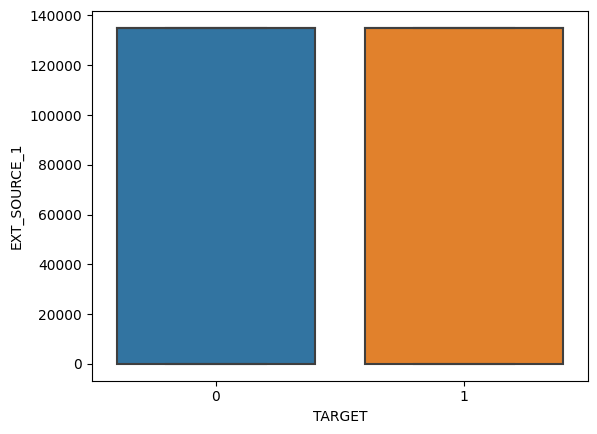

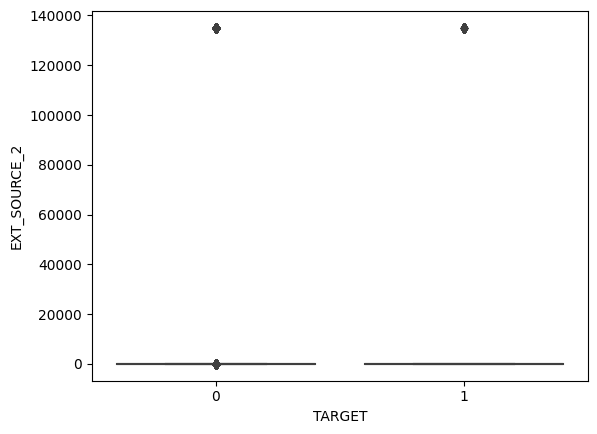

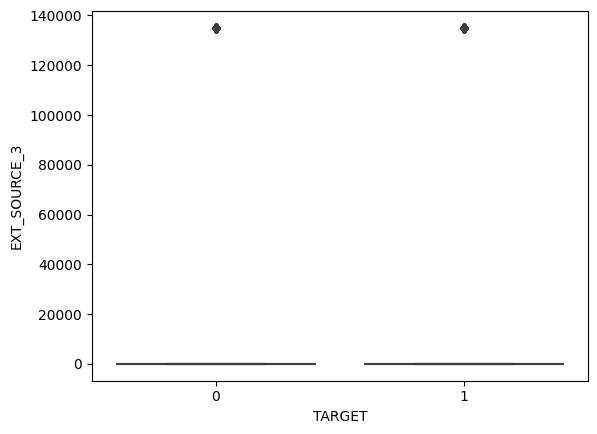

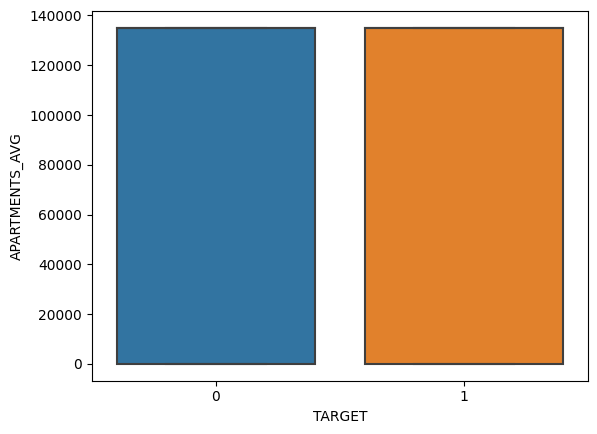

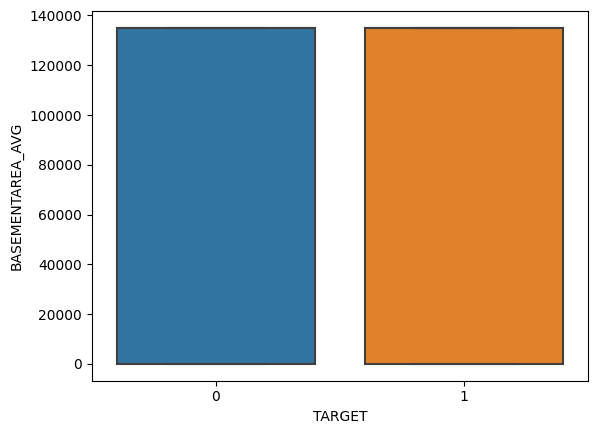

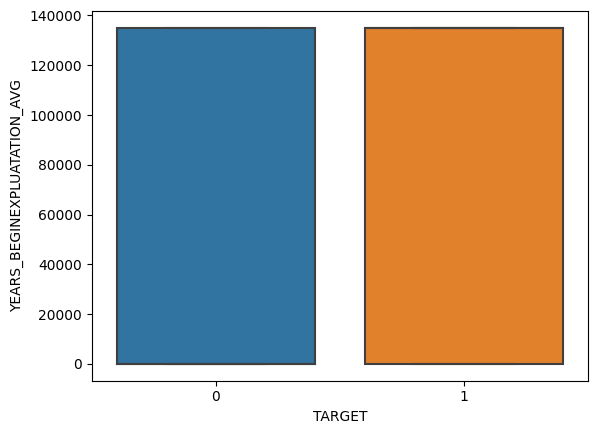

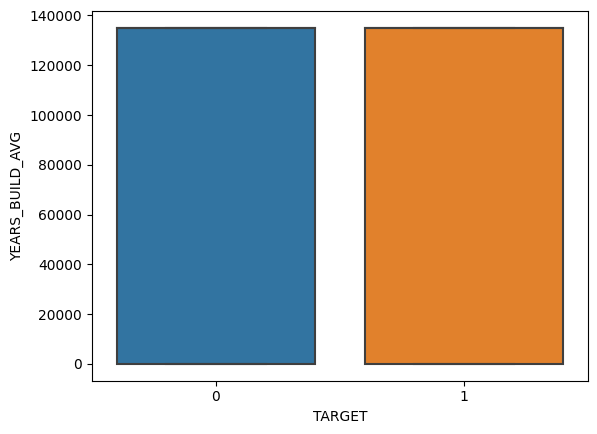

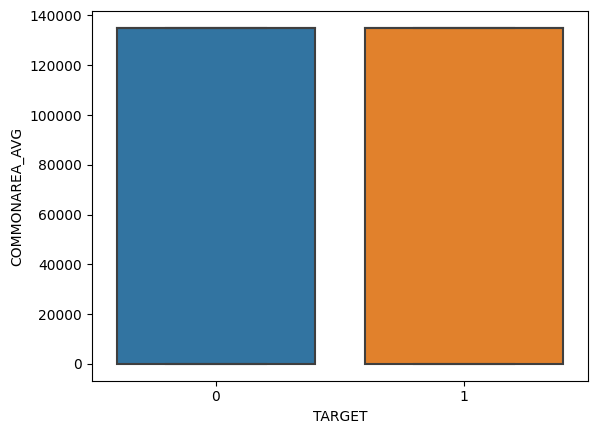

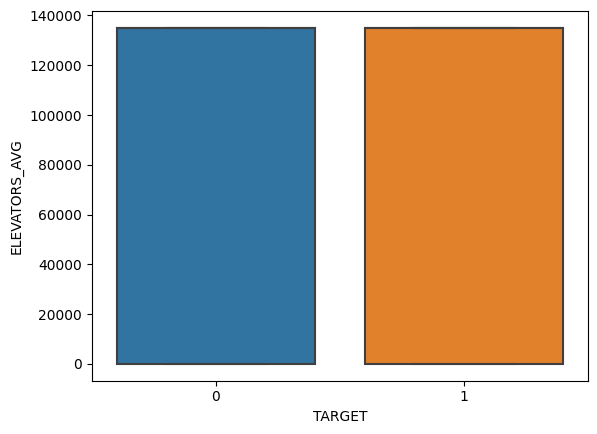

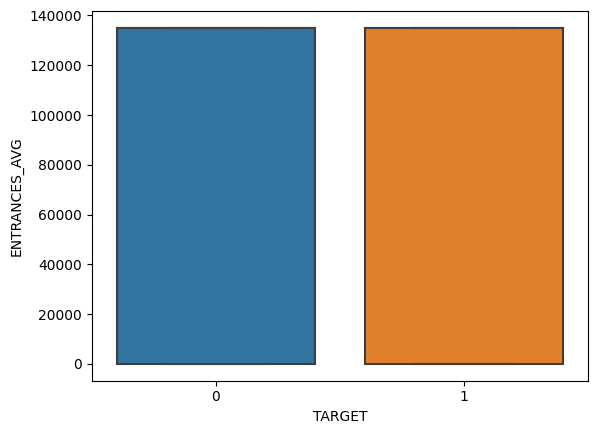

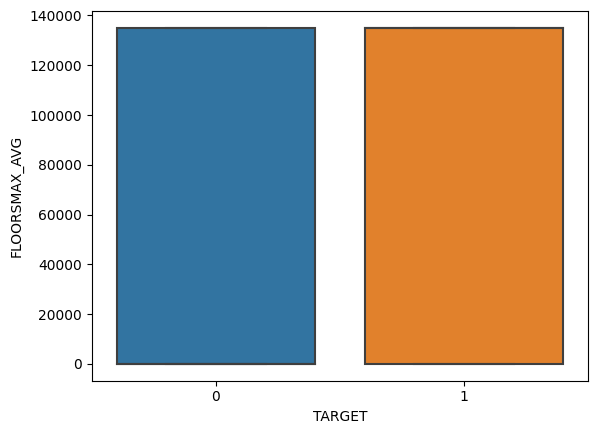

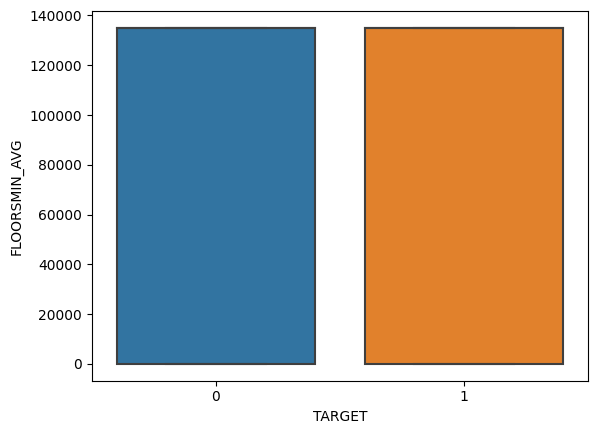

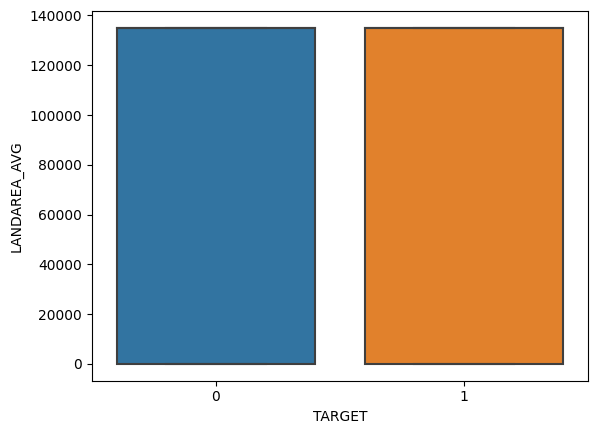

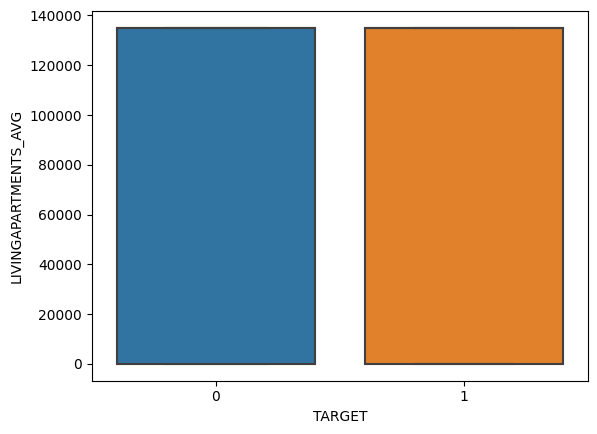

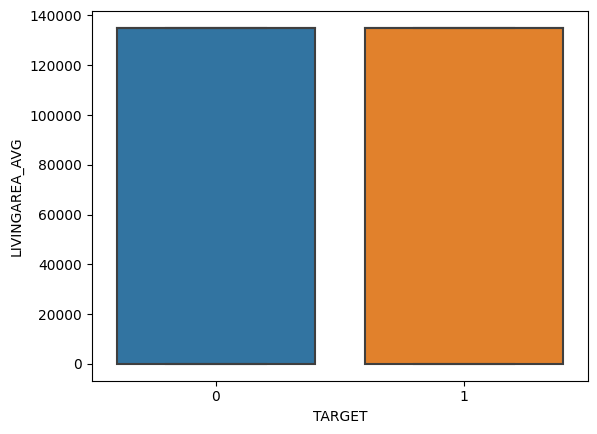

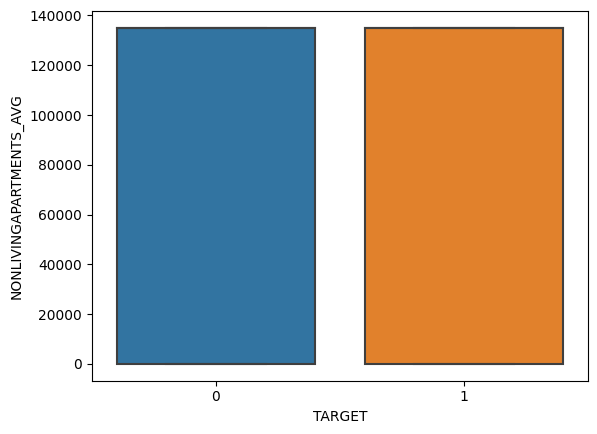

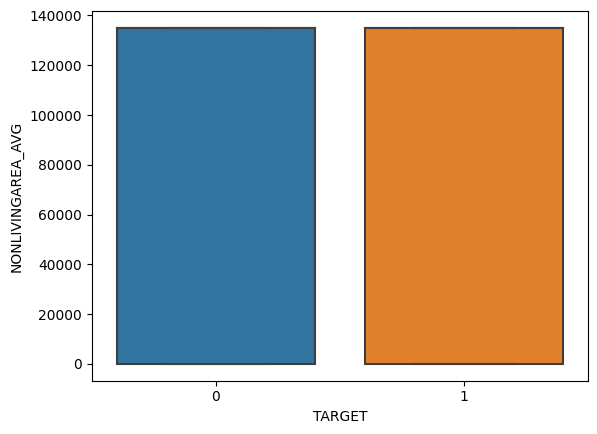

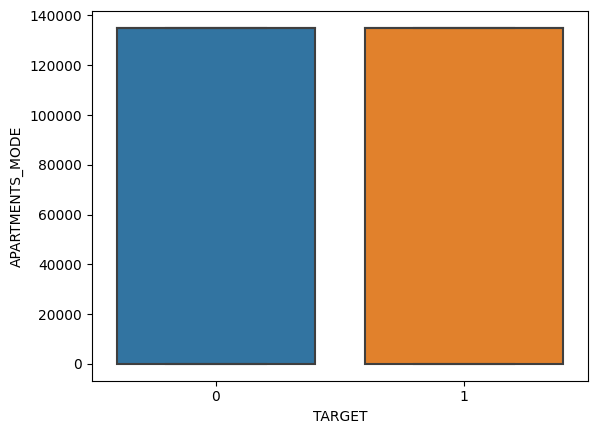

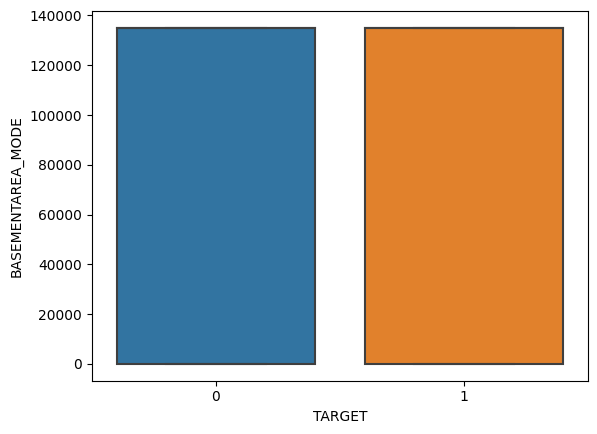

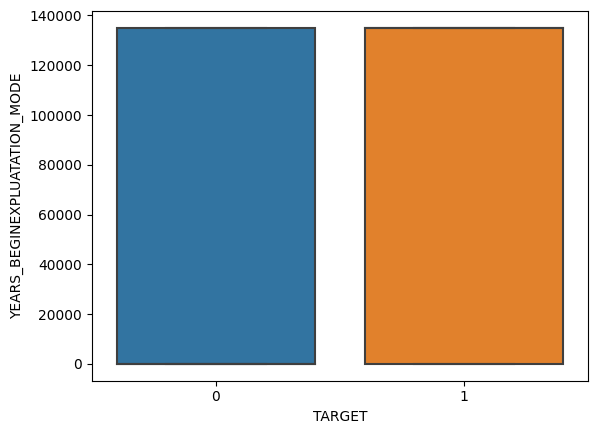

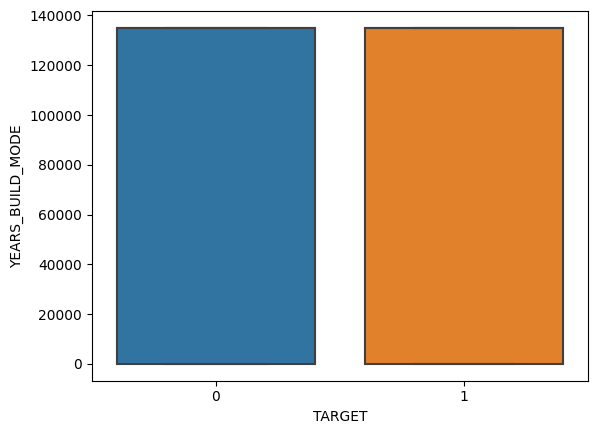

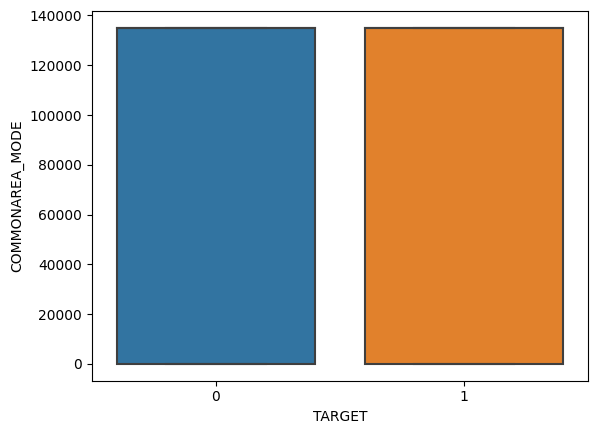

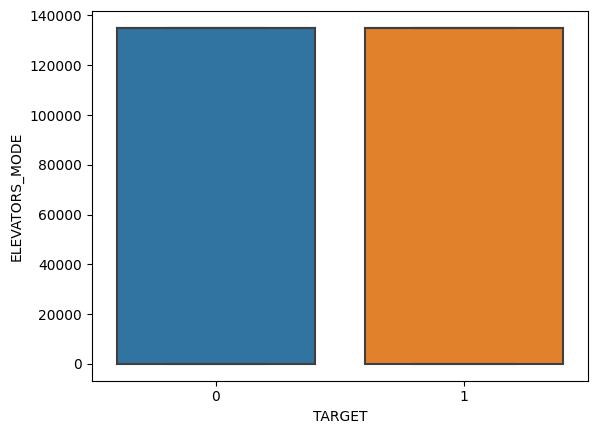

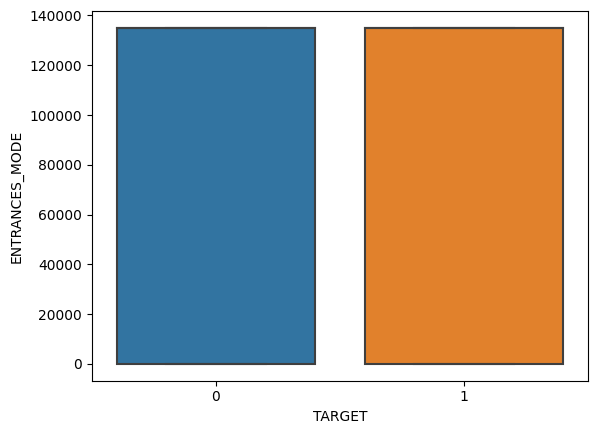

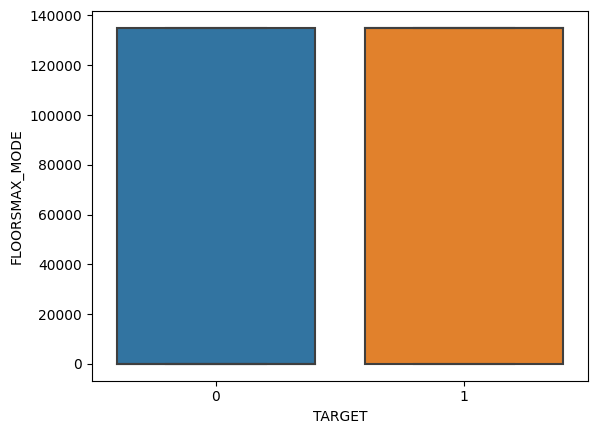

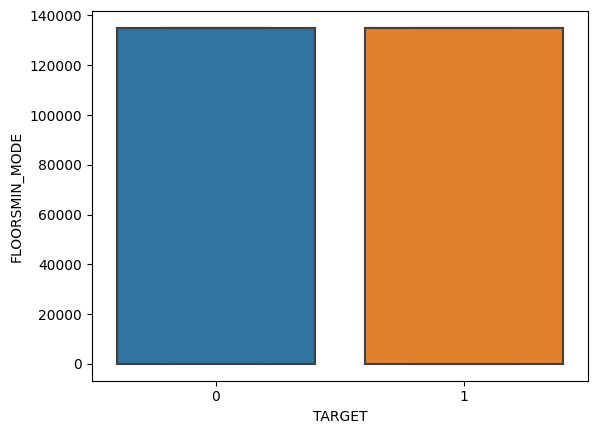

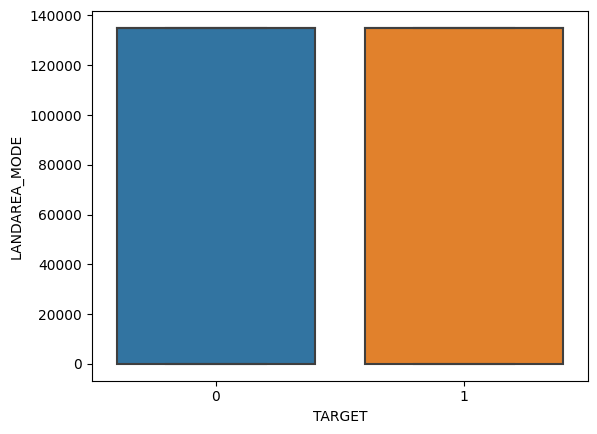

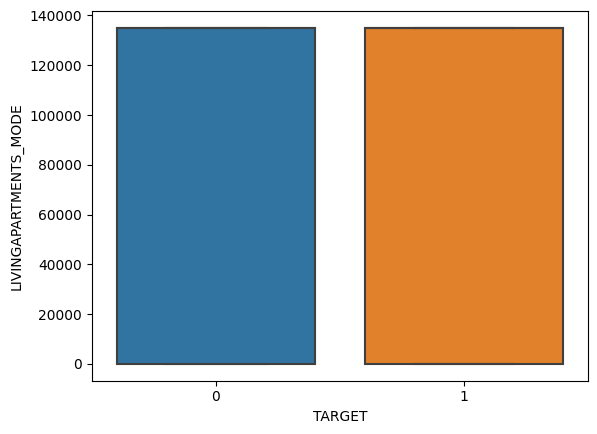

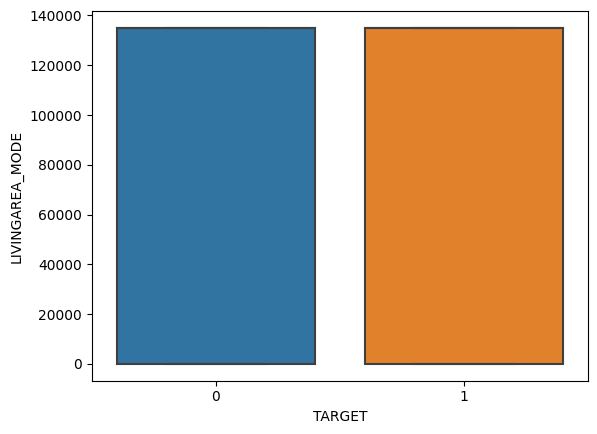

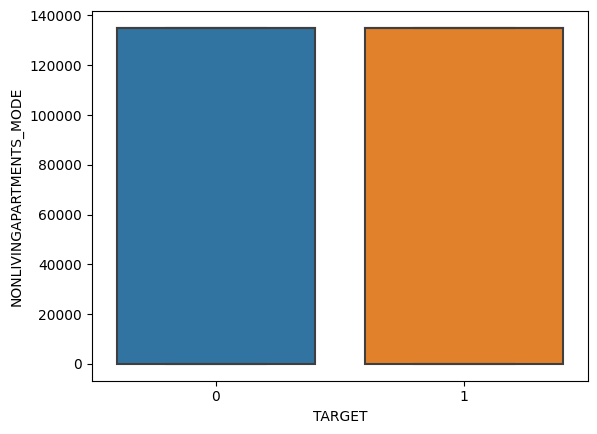

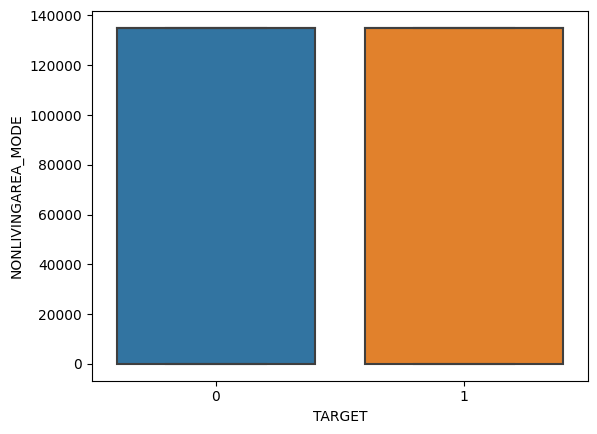

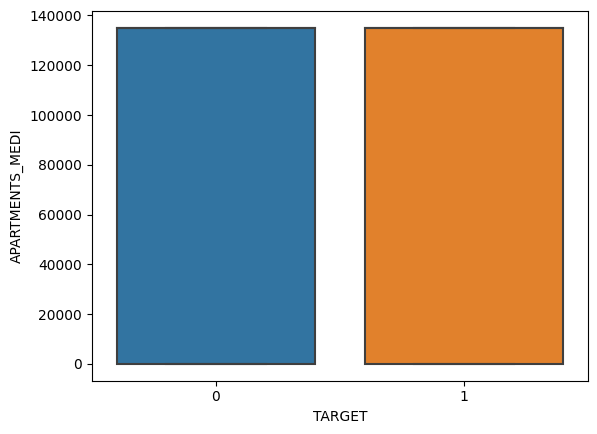

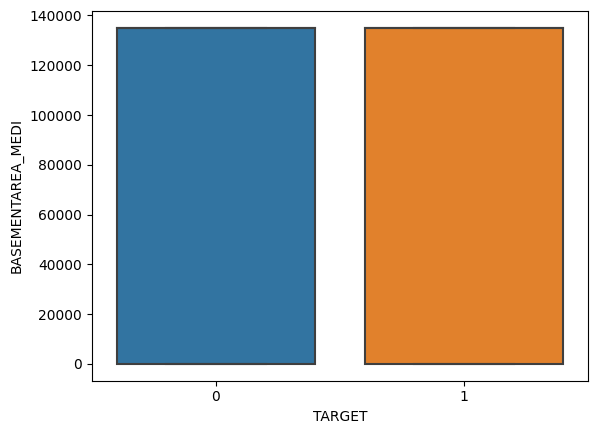

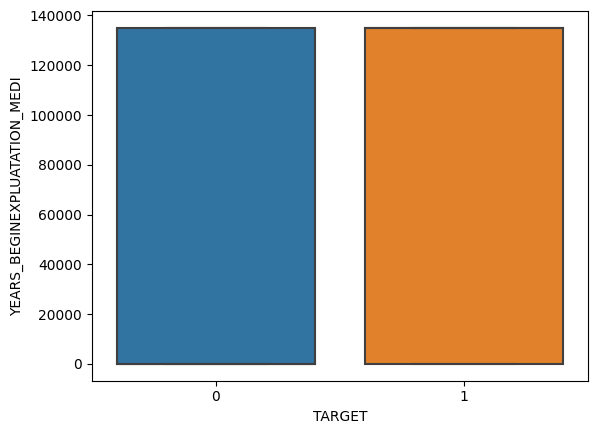

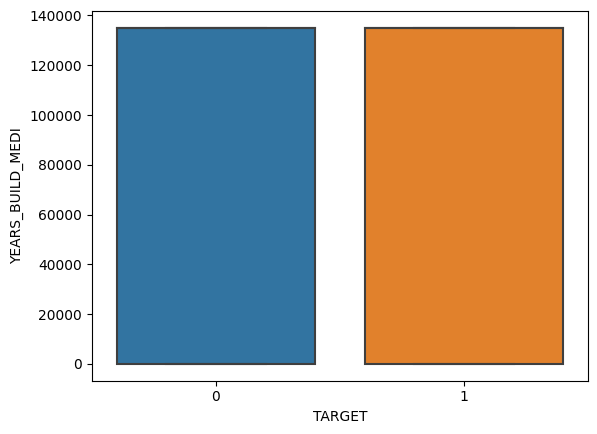

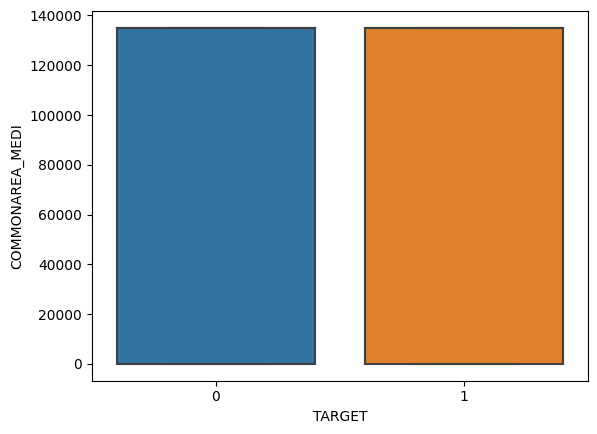

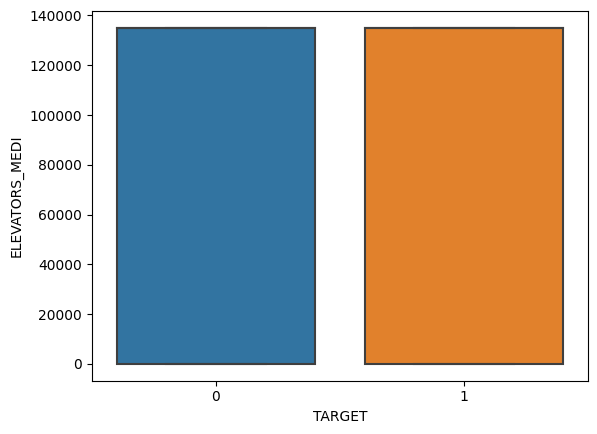

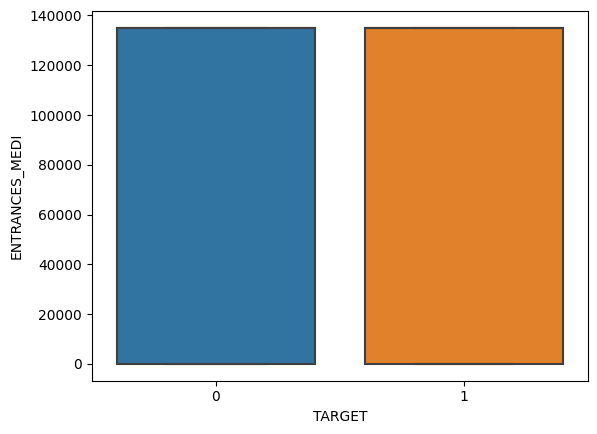

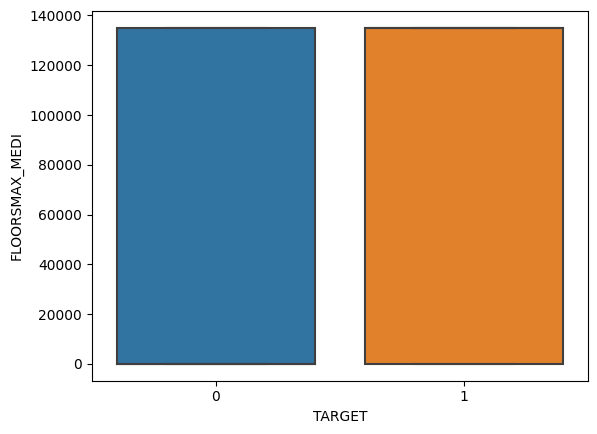

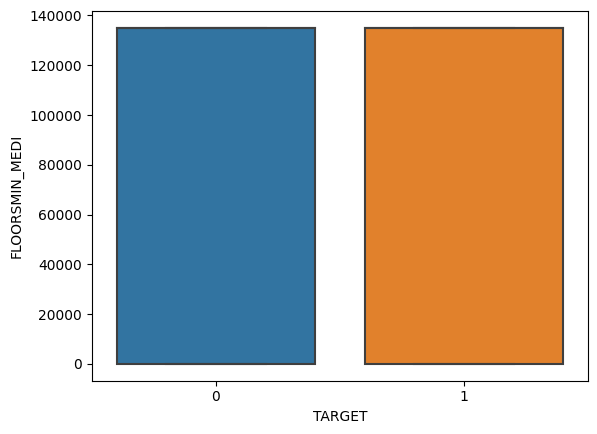

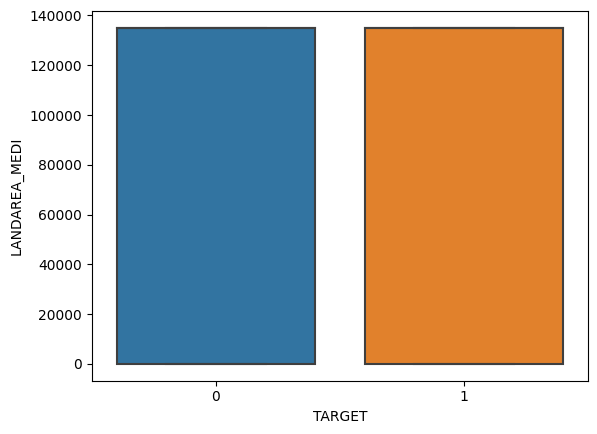

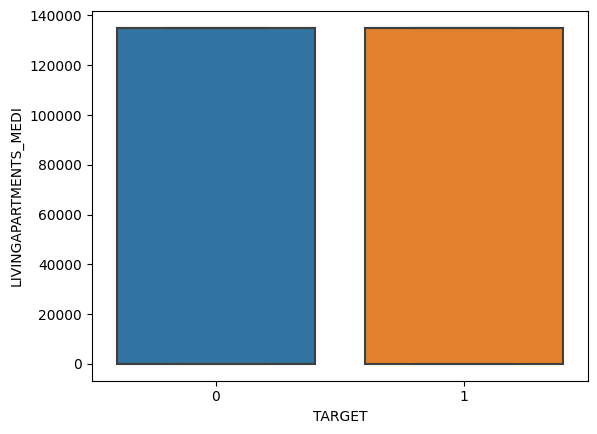

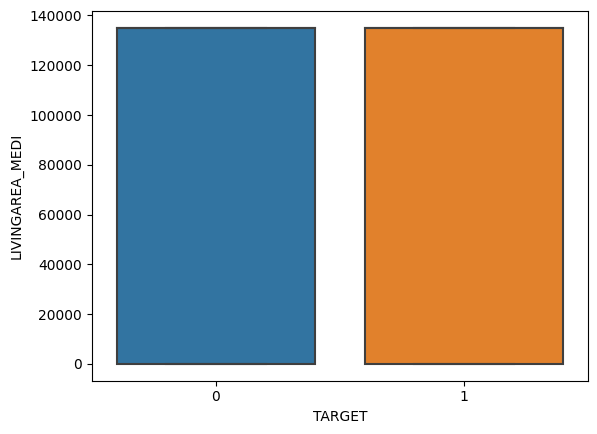

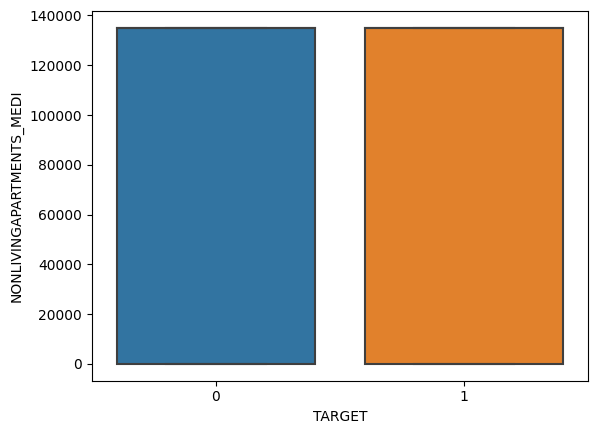

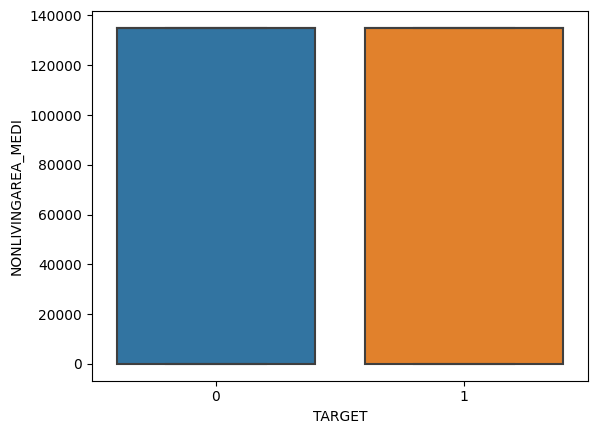

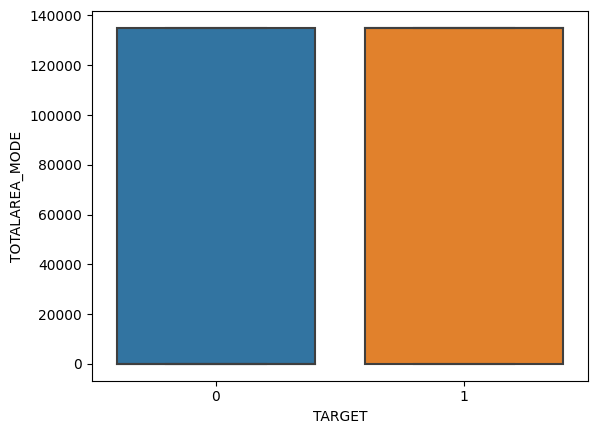

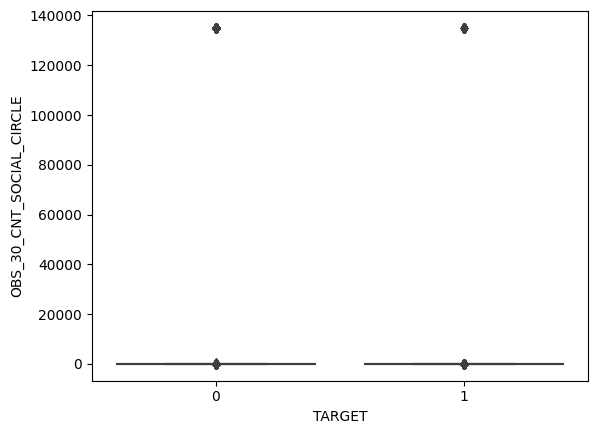

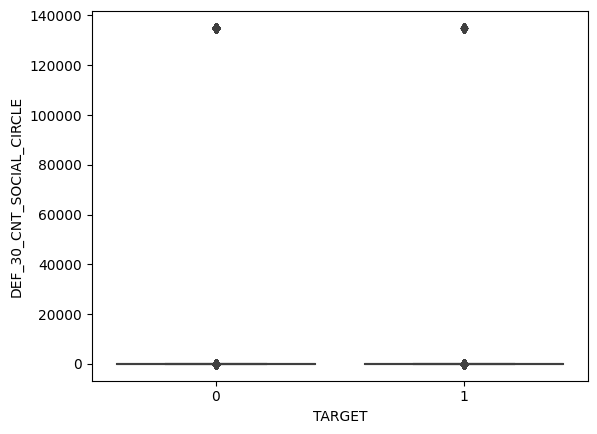

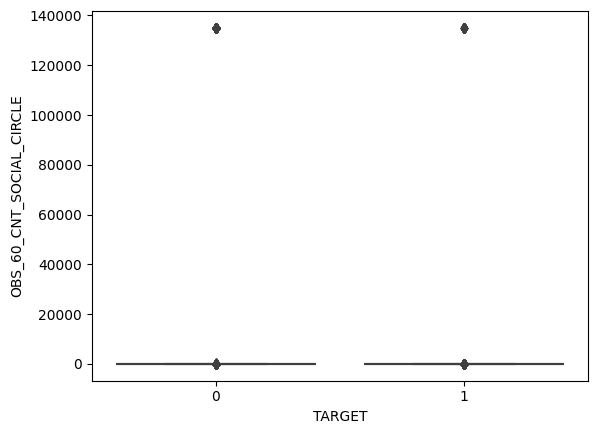

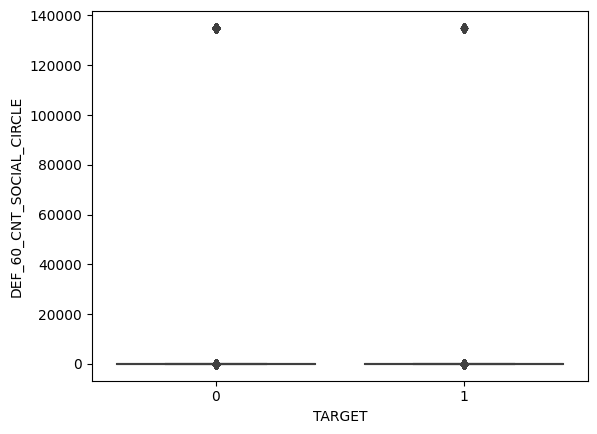

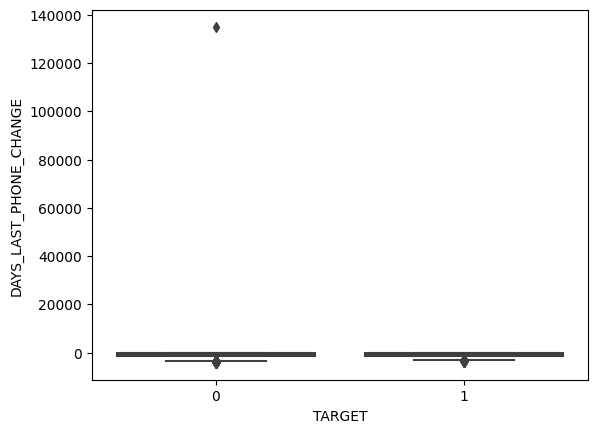

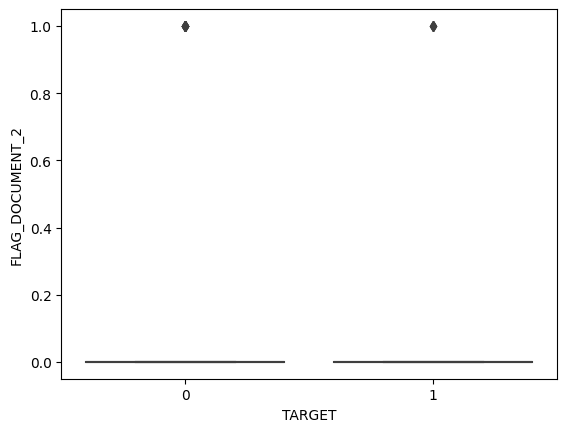

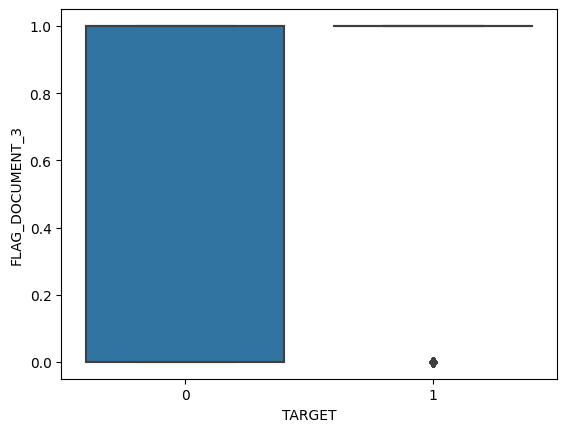

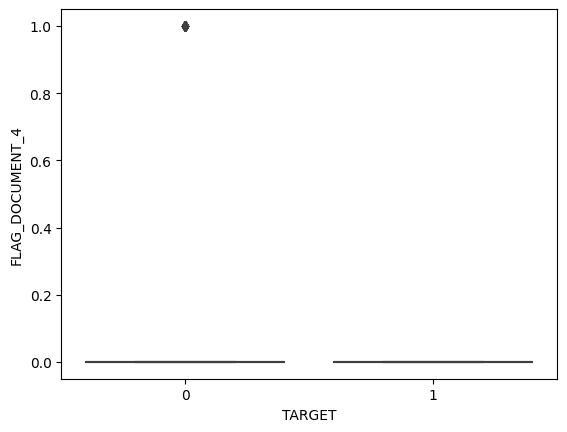

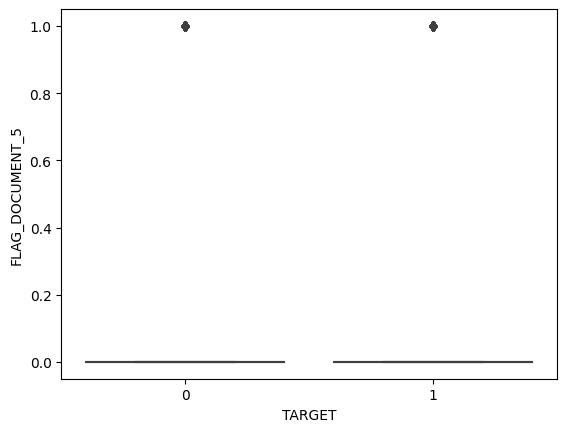

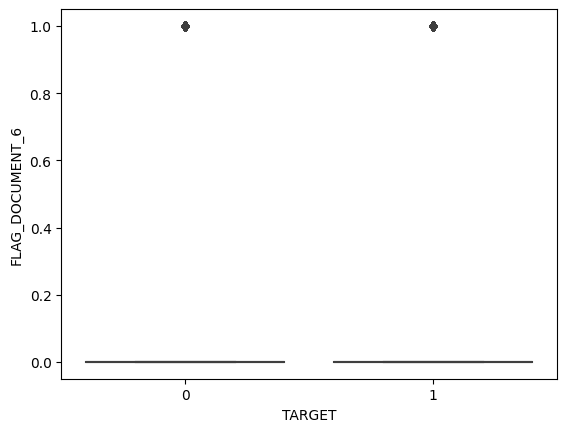

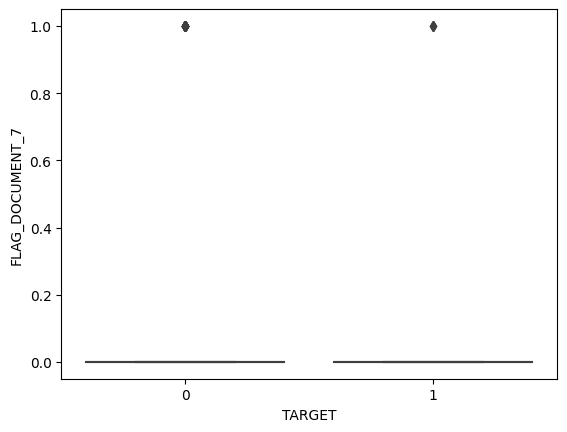

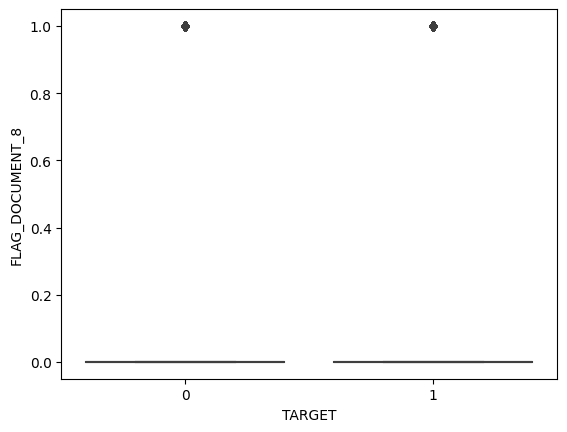

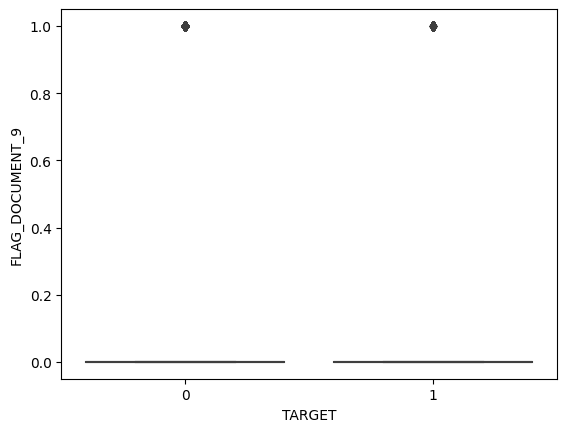

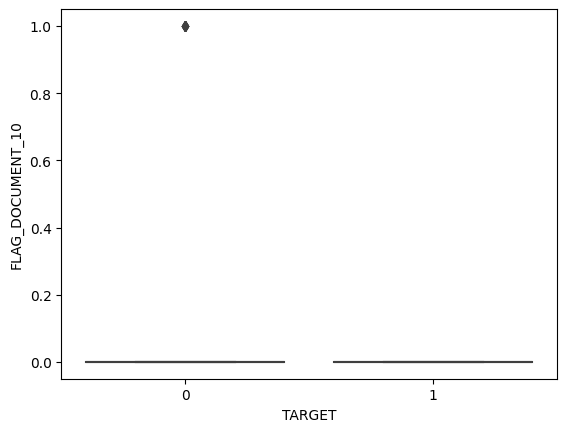

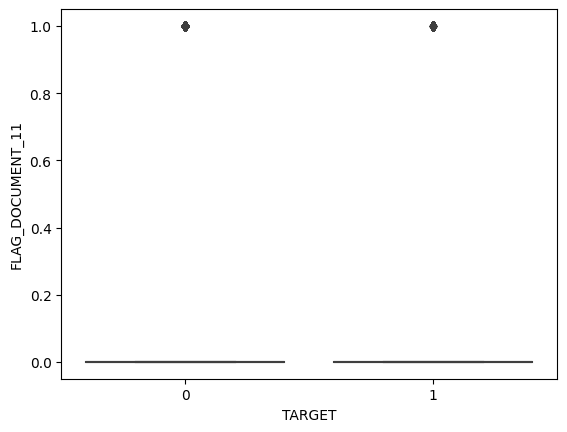

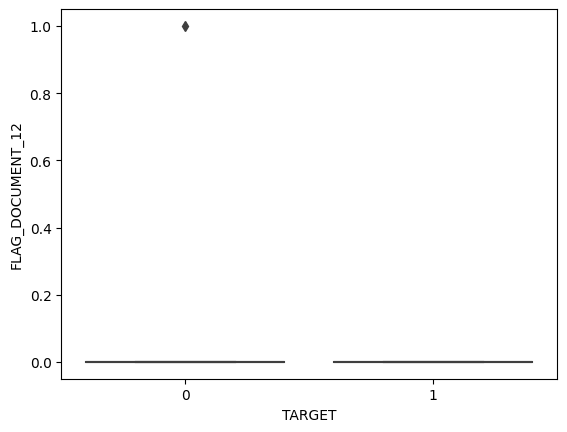

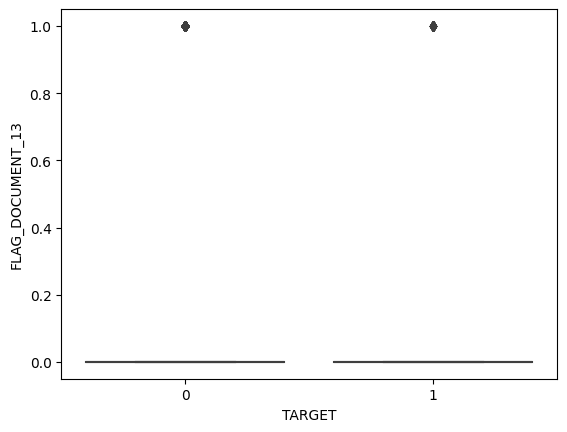

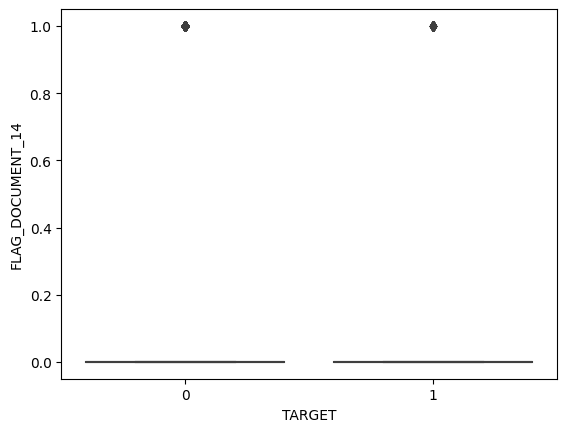

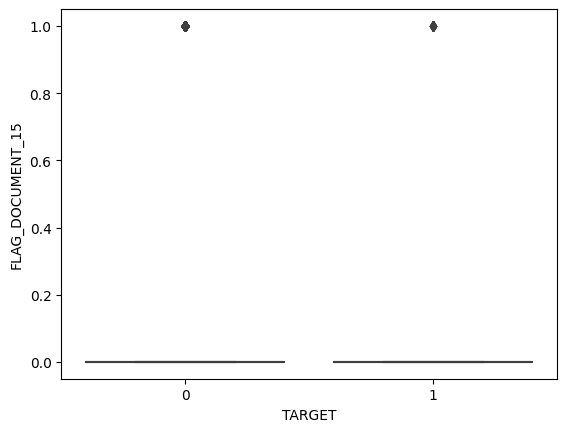

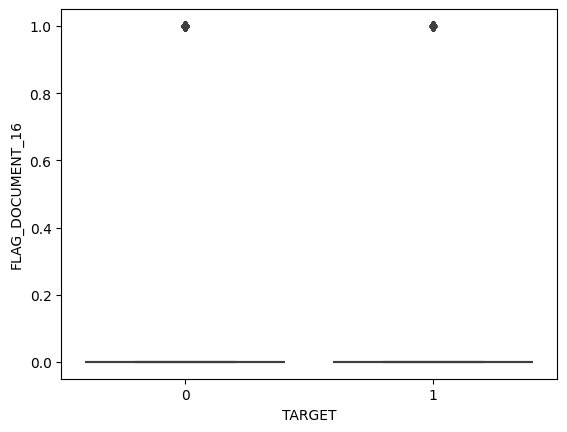

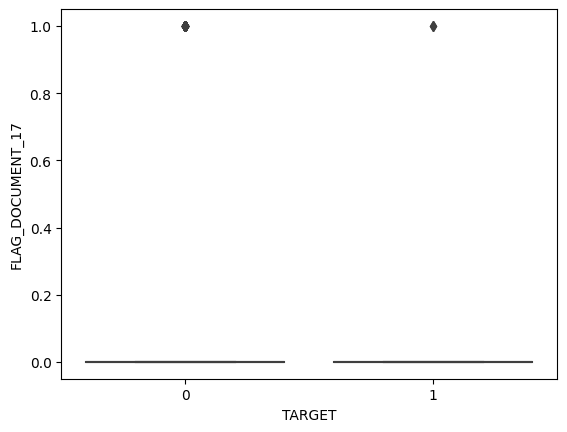

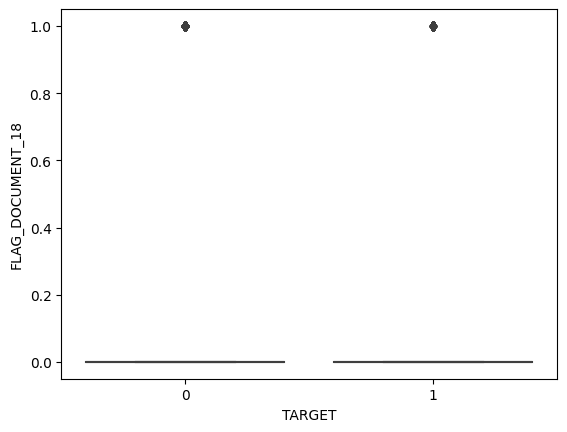

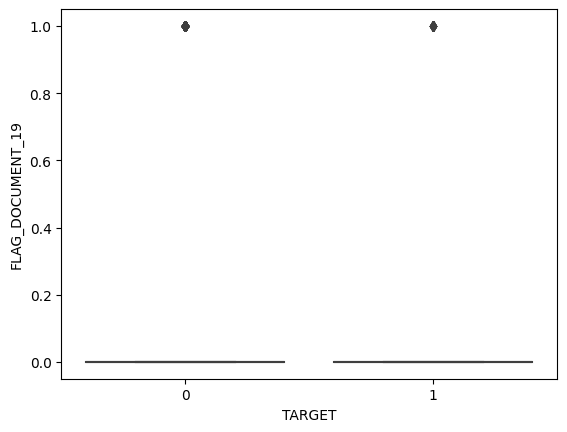

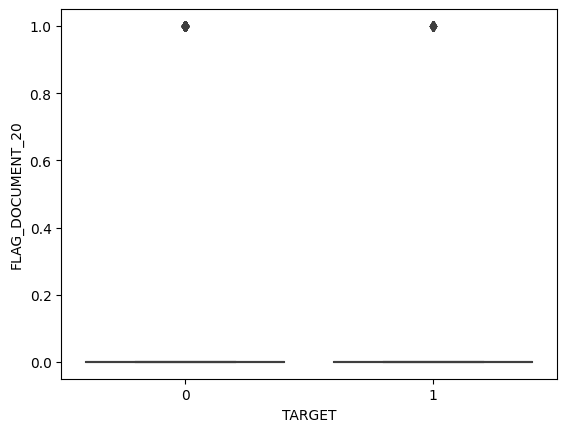

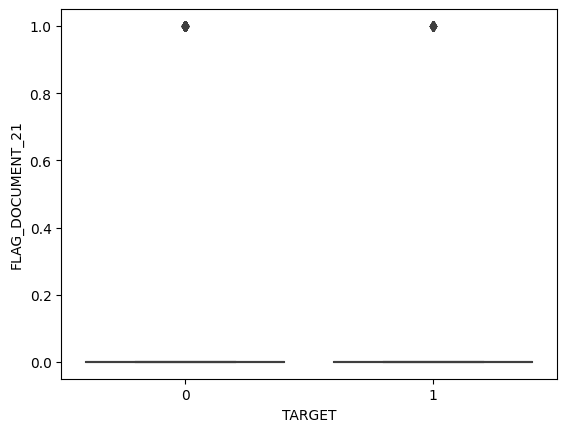

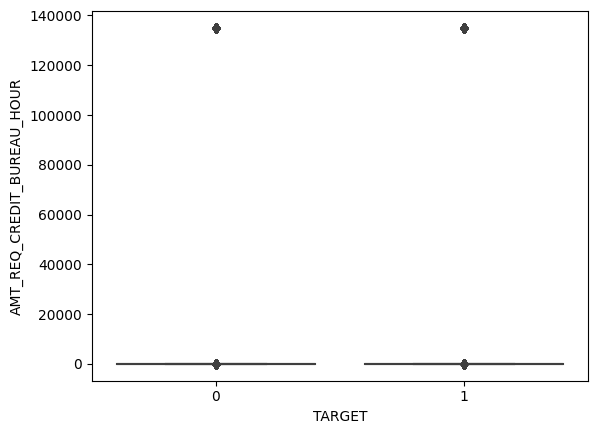

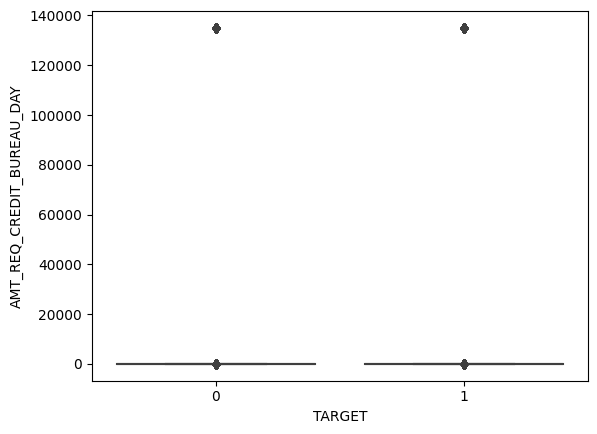

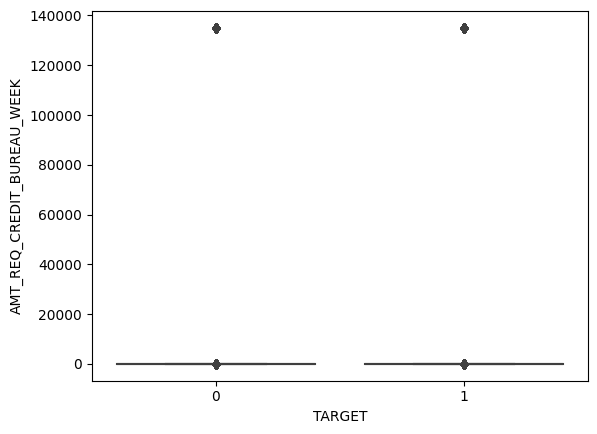

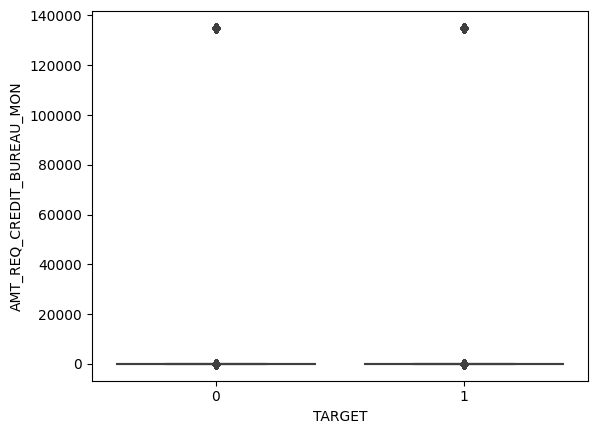

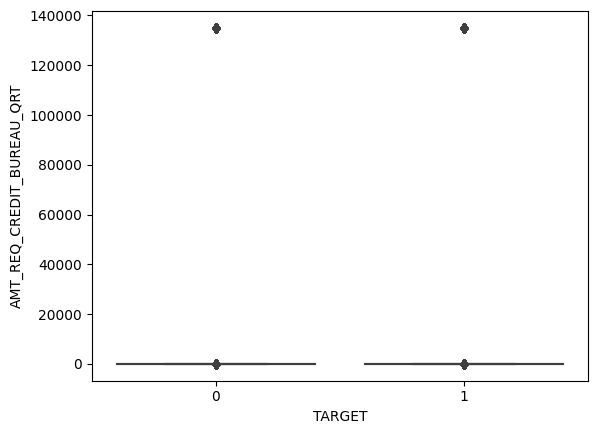

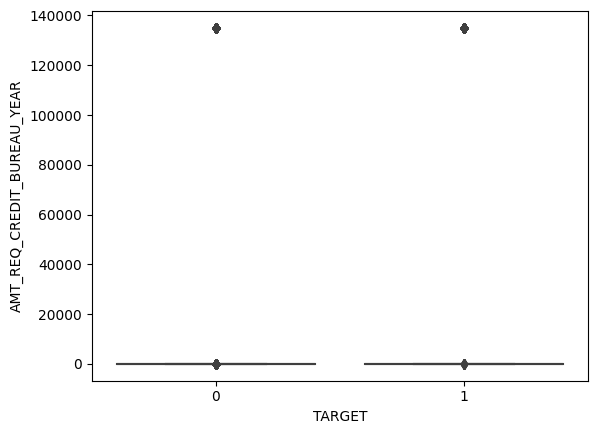

An error occurred while plotting histogram for column EMERGENCYSTATE_MODE: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.
An error occurred while plotting histogram for column EMERGENCYSTATE_MODE: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.
An error occurred while plotting histogram for column EMERGENCYSTATE_MODE: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.
An error occurred while plotting histogram for column EMERGENCYSTATE_MODE: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.
An error occurred while plotting histogram for column EMERGENCYSTATE_MODE: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, 

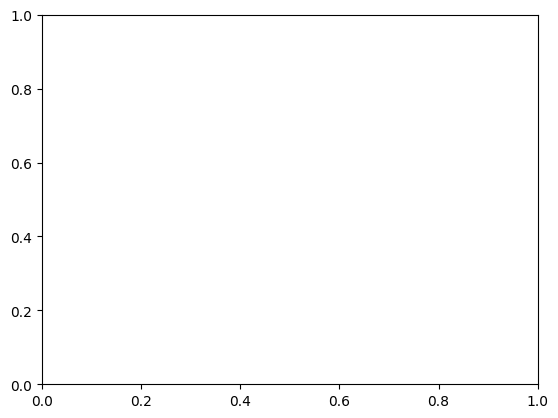

In [69]:
for col in train.columns:
    if col != 'TARGET':
        try:  

            sns.boxplot(x='TARGET', y=col, data=train)
            plt.show()
        except Exception as e:
            print(f"An error occurred while plotting histogram for column {column}: {str(e)}")

<Axes: xlabel='AMT_INCOME_TOTAL', ylabel='AMT_CREDIT'>

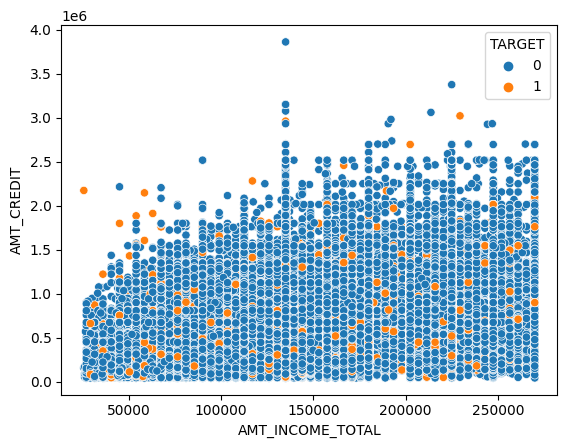

In [70]:
sns.scatterplot(x='AMT_INCOME_TOTAL', y='AMT_CREDIT', hue='TARGET', data=train)

In [71]:
# Створення нової ознаки, що відображає відношення суми кредиту до доходу
train['CREDIT_INCOME_RATIO'] = train['AMT_CREDIT'] / train['AMT_INCOME_TOTAL']

<Axes: xlabel='AMT_INCOME_TOTAL', ylabel='Count'>

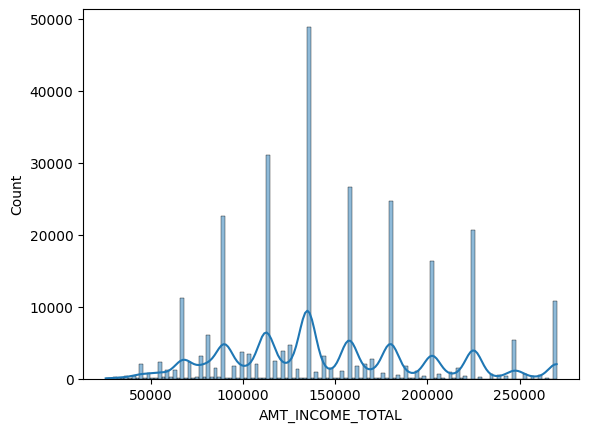

In [72]:
sns.histplot(train['AMT_INCOME_TOTAL'], kde=True)

In [89]:
X_train = train.drop('TARGET', axis = 1)
y_train = train['TARGET']
X_test = test

In [90]:
columns = train.columns
cat_features = train.select_dtypes(include=["object"]).columns
num_features = train.select_dtypes(include=["float64", "int64"]).columns
print(columns)
print(cat_features)
print(num_features)

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'WALLSMATERIAL_MODE_Block', 'WALLSMATERIAL_MODE_Mixed',
       'WALLSMATERIAL_MODE_Monolithic', 'WALLSMATERIAL_MODE_Others',
       'WALLSMATERIAL_MODE_Panel', 'WALLSMATERIAL_MODE_Stone, brick',
       'WALLSMATERIAL_MODE_Wooden', 'EMERGENCYSTATE_MODE_No',
       'EMERGENCYSTATE_MODE_Yes', 'CREDIT_INCOME_RATIO'],
      dtype='object', length=247)
Index([], dtype='object')
Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_C

In [98]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# класифікація 
transformer = ColumnTransformer(
    transformers = [
        ("cat_features", OneHotEncoder(), cat_features),
        ("num_features", StandardScaler(), num_features.drop("TARGET"))
    ],
)

fit_trainData = pd.DataFrame(transformer.fit_transform(train.drop('TARGET', axis = 1)))
fit_trainData = pd.DataFrame(transformer.transform(train[columns.drop("TARGET")]))
fit_trainData

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,104,105
0,-1.733622,-0.575066,1.029849,-0.450343,-0.115807,-0.480148,-0.123686,1.498678,-0.464127,0.387108,...,-0.024004,-0.022538,-0.018462,-0.398374,-0.398374,-0.398375,-0.398380,-0.398380,-0.398393,-0.775369
1,-1.733612,-0.575066,2.270127,1.856348,0.703706,1.735215,-1.282472,-0.162652,-0.467987,1.084890,...,-0.024004,-0.022538,-0.018462,-0.398374,-0.398374,-0.398375,-0.398380,-0.398380,-0.398415,0.208851
2,-1.733603,-0.575066,-1.450708,-1.156722,-1.453382,-1.094816,-0.789570,-0.681477,-0.461241,0.213654,...,-0.024004,-0.022538,-0.018462,-0.398374,-0.398374,-0.398375,-0.398380,-0.398380,-0.398415,-0.778159
3,-1.733583,-0.575066,-0.210430,-0.694600,0.255724,-0.633815,-0.942430,-0.672151,-0.480954,-1.365852,...,-0.024004,-0.022538,-0.018462,2.510204,2.510204,2.510204,2.510204,2.510204,2.510204,-0.666340
4,-1.733574,-0.575066,-0.458485,-0.173608,-0.327056,-0.019148,0.625196,-0.883002,-0.480947,0.199199,...,-0.024004,-0.022538,-0.018462,-0.398374,-0.398374,-0.398375,-0.398380,-0.398380,-0.398415,0.007779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293471,1.732424,-0.575066,0.202996,-0.845403,0.097119,-0.838704,0.921196,1.529157,-0.461318,-0.975581,...,-0.024004,-0.022538,-0.018462,2.510204,2.510204,2.510204,2.510204,2.510204,2.510204,-0.913565
293472,1.732433,-0.575066,-1.368023,-0.806780,-1.062068,-0.838704,0.359496,-1.074746,2.099104,0.177376,...,-0.024004,-0.022538,-0.018462,2.510204,2.510204,2.510204,2.510204,2.510204,2.510204,-0.161443
293473,1.732443,-0.575066,0.120311,0.254656,0.277519,0.185741,-1.171529,0.246539,-0.515156,-0.488380,...,-0.024004,-0.022538,-0.018462,-0.398353,-0.398374,-0.398375,-0.398358,-0.398380,-0.398393,0.080973
293474,1.732453,-0.575066,0.451052,-0.545248,-0.450787,-0.569787,-1.147913,0.930041,-0.493193,0.694903,...,-0.024004,-0.022538,-0.018462,-0.398374,-0.398374,-0.398375,-0.398380,-0.398380,-0.398415,-0.720026


In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train_s, x_valid, Y_train_s, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state = 42)
clf = LogisticRegression(class_weight = "balanced", max_iter=3000).fit(X_train_s, Y_train_s)

In [95]:
test_predict = clf.predict(x_valid)
df = pd.DataFrame(test_predict)
df.to_csv("submission_final.csv", index=False)